In [308]:
from pandas import read_csv
dt=read_csv("/content/EU-referendum-result-data.csv")

In [309]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       382 non-null    int64  
 1   Region_Code              382 non-null    object 
 2   Region                   382 non-null    object 
 3   Area_Code                382 non-null    object 
 4   Area                     382 non-null    object 
 5   Electorate               382 non-null    int64  
 6   ExpectedBallots          382 non-null    int64  
 7   VerifiedBallotPapers     382 non-null    int64  
 8   Pct_Turnout              382 non-null    float64
 9   Votes_Cast               382 non-null    int64  
 10  Valid_Votes              382 non-null    int64  
 11  Remain                   382 non-null    int64  
 12  Leave                    382 non-null    int64  
 13  Rejected_Ballots         382 non-null    int64  
 14  No_official_mark         3

In [310]:
#asegurando el tipo de dato
dt.loc[:,"id":"Area"]=dt.loc[:,"id":"Area"].astype("string")
dt["Region"]=dt["Region"].astype("category")
dt.head()


<ipython-input-310-08ace1410910>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt.loc[:,"id":"Area"]=dt.loc[:,"id":"Area"].astype("string")


,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,87392,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,84481,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,79916,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,86066,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [311]:
"observando si hay duplicados"
print("duplicados: ",dt.id.duplicated(keep=False).sum())
print("\n\n")
#no hay duplicados

"observando si hay nulos"
print("nulos:\n",dt.isnull().sum())
#no hay nulos

duplicados:  0



nulos:
 id                         0
Region_Code                0
Region                     0
Area_Code                  0
Area                       0
Electorate                 0
ExpectedBallots            0
VerifiedBallotPapers       0
Pct_Turnout                0
Votes_Cast                 0
Valid_Votes                0
Remain                     0
Leave                      0
Rejected_Ballots           0
No_official_mark           0
Voting_for_both_answers    0
Writing_or_mark            0
Unmarked_or_void           0
Pct_Remain                 0
Pct_Leave                  0
Pct_Rejected               0
dtype: int64


"""Calcular quién está a favor de la UE y quién no."""

In [312]:
dt_temporal_condados=dt.groupby(["Area"])["Remain","Leave"].sum().reset_index().reset_index()
dt_temporal_condados["favor pct"]=(dt_temporal_condados.Remain*100)/(dt_temporal_condados.Remain+dt_temporal_condados.Leave)
dt_temporal_condados["contra pct"]=(dt_temporal_condados.Leave*100)/(dt_temporal_condados.Remain+dt_temporal_condados.Leave)

<ipython-input-312-a96c5f0a7b7d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt_temporal_condados=dt.groupby(["Area"])["Remain","Leave"].sum().reset_index().reset_index()


In [313]:
dt_condados_Remain=dt_temporal_condados[dt_temporal_condados.Remain > dt_temporal_condados.Leave].sort_values(by="favor pct", ascending=False)
dt_condados_Contra=dt_temporal_condados[dt_temporal_condados.Remain < dt_temporal_condados.Leave].sort_values(by="contra pct", ascending=False)
dt_condados_Remain=dt_condados_Remain.head(10)
dt_condados_Contra=dt_condados_Contra.head(10)
dt_condados_Contra


,index,Area,Remain,Leave,favor pct,contra pct
29,29,Boston,7430,22974,24.437574,75.562426
287,287,South Holland,13074,36423,26.413722,73.586278
56,56,Castle Point,14154,37691,27.300608,72.699392
332,332,Thurrock,22151,57765,27.717854,72.282146
135,135,Great Yarmouth,14284,35844,28.495053,71.504947
122,122,Fenland,15055,37571,28.607532,71.392468
190,190,Mansfield,16417,39927,29.137086,70.862914
27,27,Bolsover,12242,29730,29.167064,70.832936
104,104,East Lindsey,23515,56613,29.346795,70.653205
216,216,North East Lincolnshire,23797,55185,30.129650,69.870350


Text(0.5, 0, 'Condados')

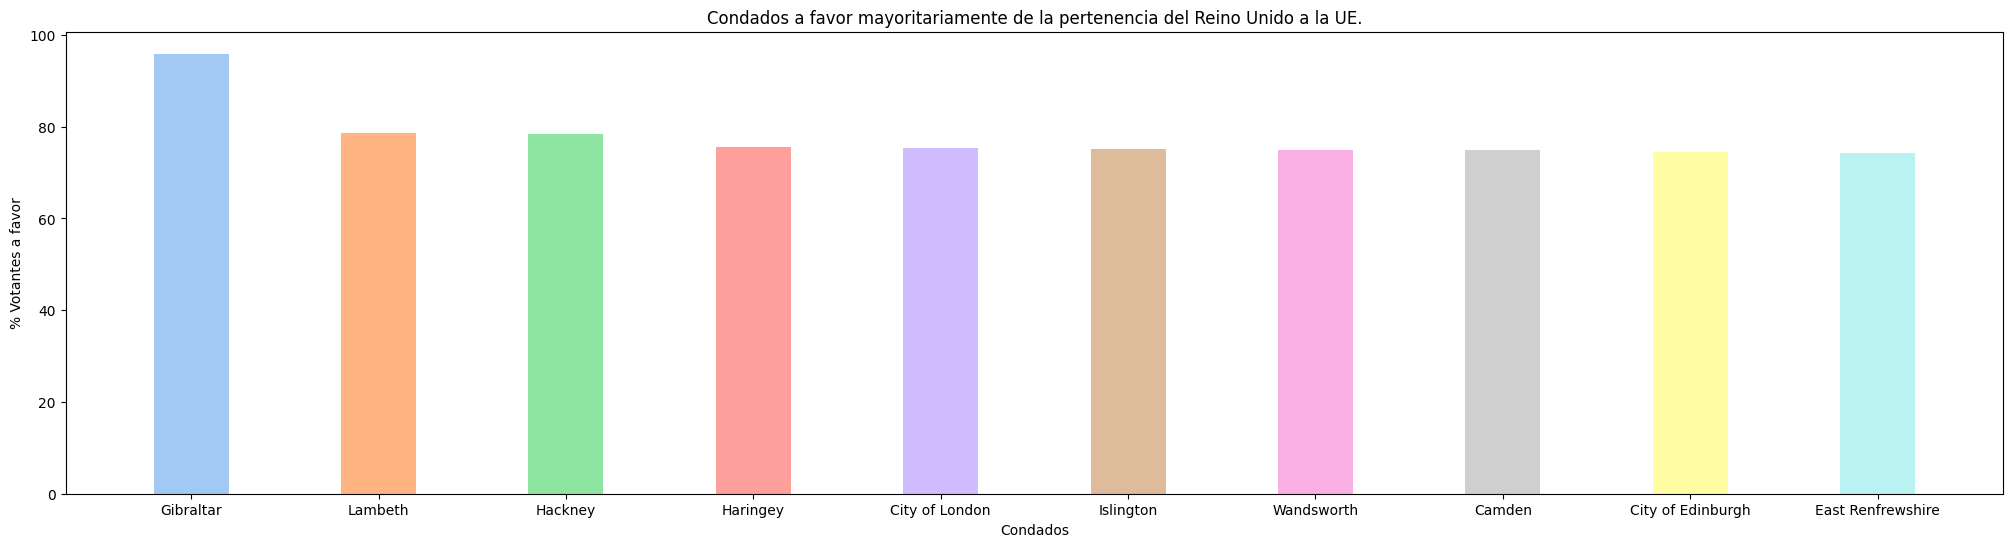

In [314]:
from pandas import Series
from seaborn import color_palette
from matplotlib.pyplot import bar,legend,xticks,figure,title,ylabel,xlabel

figure(figsize=(25,6))
color1=color_palette("pastel",10)
bar(dt_condados_Remain["Area"],dt_condados_Remain["favor pct"].sort_values(ascending=False), color=color1,width=0.4)
title("Condados a favor mayoritariamente de la pertenencia del Reino Unido a la UE.")
ylabel("% Votantes a favor")
xlabel("Condados")

Text(0.5, 0, 'Condados')

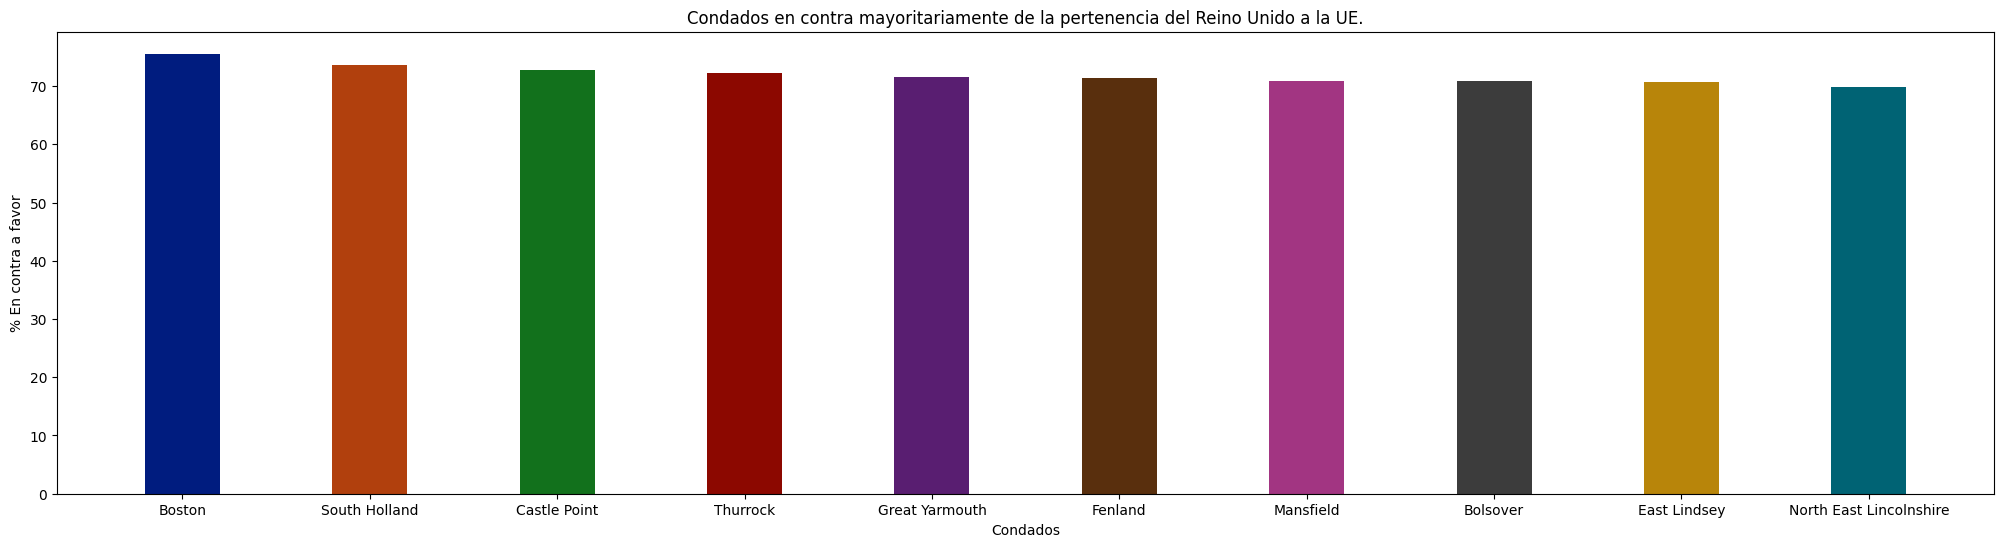

In [315]:
figure(figsize=(25,6))
color1=color_palette("dark",10)
bar(dt_condados_Contra["Area"],dt_condados_Contra["contra pct"].sort_values(ascending=False), color=color1,width=0.4)
title("Condados en contra mayoritariamente de la pertenencia del Reino Unido a la UE.")
ylabel("% En contra a favor")
xlabel("Condados")

In [316]:

dt_temporal=dt.groupby(["Region"])["Remain","Leave"].sum().reset_index().sort_values(by="Leave",ascending=False)
index=range(0,12)
dt_temporal["index"]=index
dt_temporal

<ipython-input-316-c1339415c1be>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt_temporal=dt.groupby(["Region"])["Remain","Leave"].sum().reset_index().sort_values(by="Leave",ascending=False)


,Region,Remain,Leave,index
7,South East,2391718,2567965,0
4,North West,1699020,1966925,1
0,East,1448616,1880367,2
10,West Midlands,1207175,1755687,3
8,South West,1503019,1669711,4
11,Yorkshire and The Humber,1158298,1580937,5
2,London,2263519,1513232,6
1,East Midlands,1033036,1475479,7
6,Scotland,1661191,1018322,8
9,Wales,772347,854572,9


Text(0.5, 0, 'Regiones')

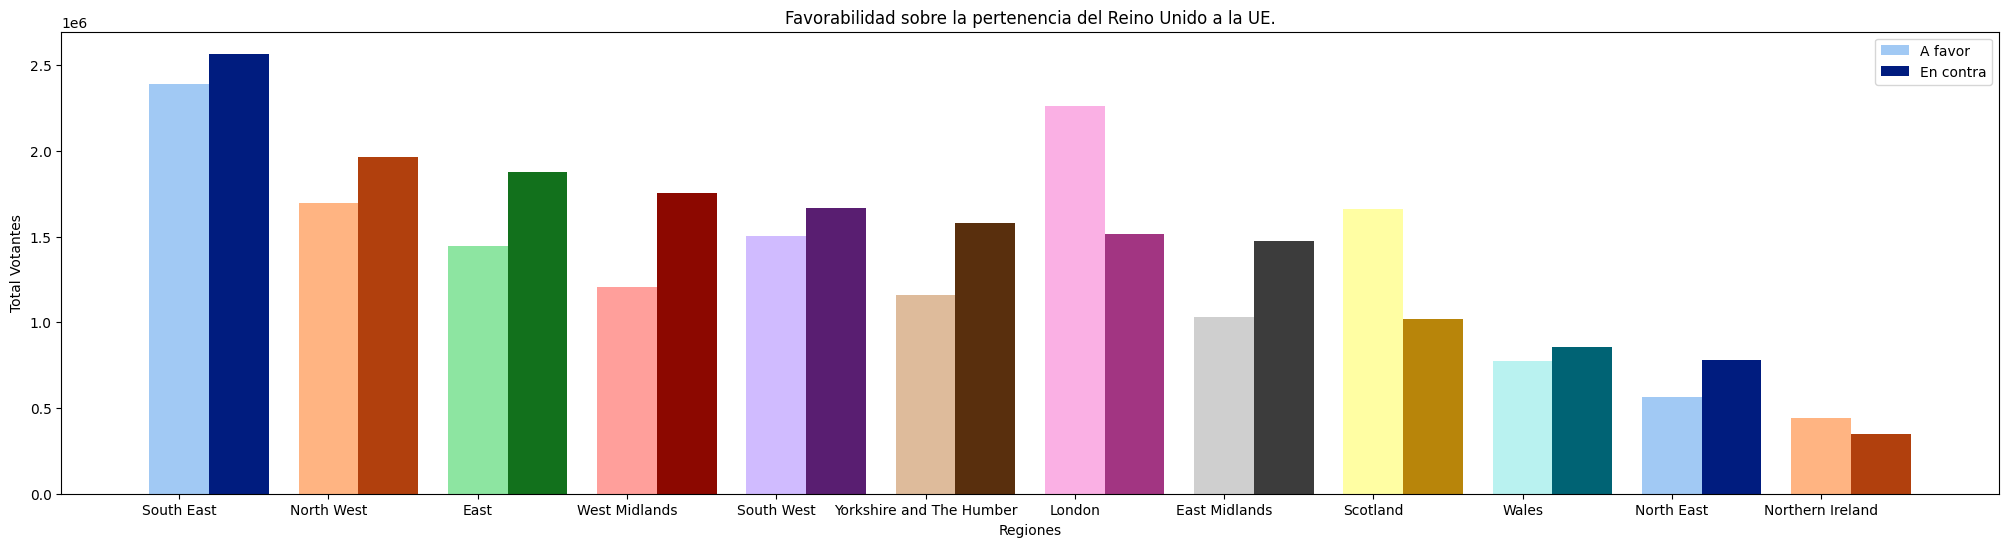

In [317]:

figure(figsize=(25,6))
color=color_palette("pastel",12)
color1=color_palette("dark",12)
a=Series(dt_temporal["index"])
bar(a,dt_temporal["Remain"], color=color,width=0.4)
bar(a+0.4,dt_temporal["Leave"], color=color1,width=0.4)
legend(["A favor","En contra"])
xticks(a,dt_temporal.loc[:,"Region"])
title("Favorabilidad sobre la pertenencia del Reino Unido a la UE.")
ylabel("Total Votantes")
xlabel("Regiones")

Text(0.5, 0, 'Regiones')

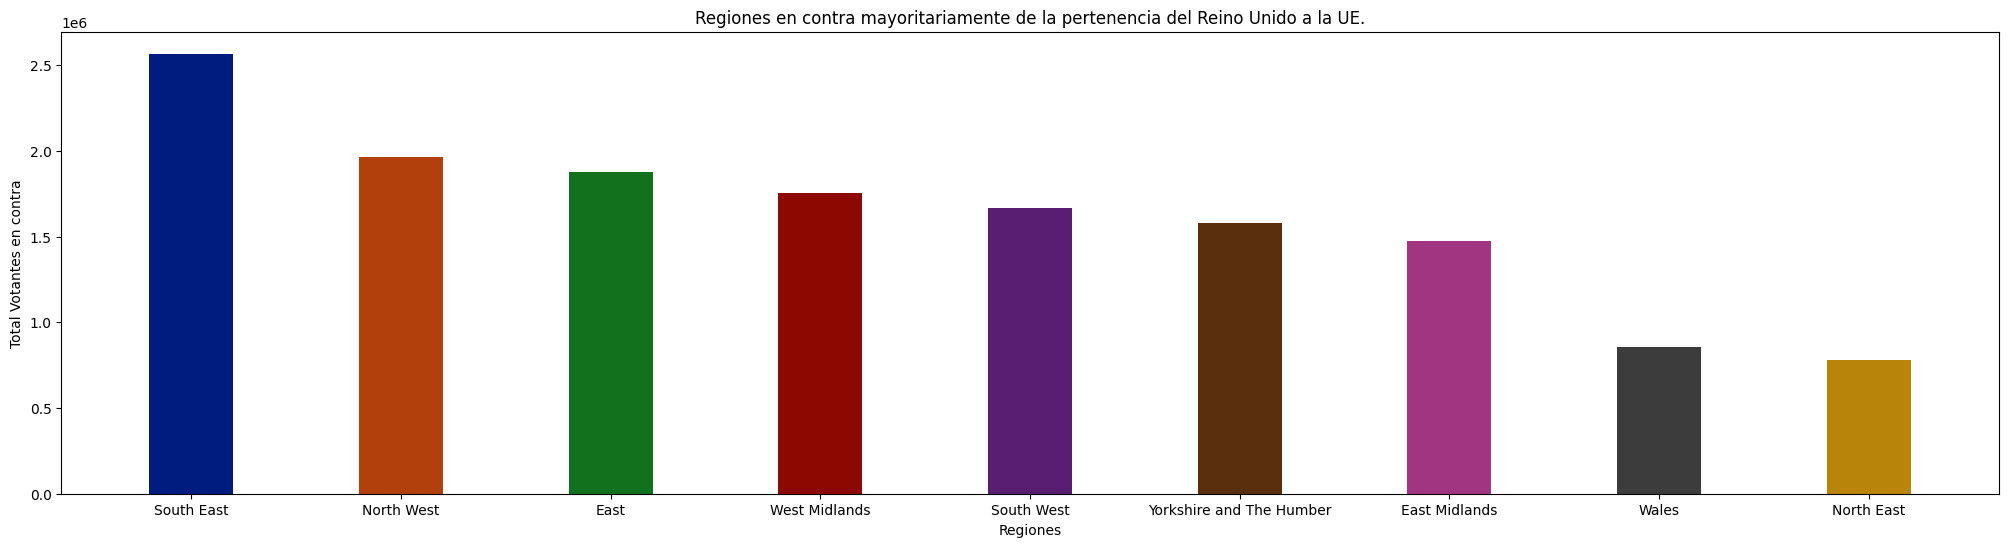

In [318]:
x_contra=dt_temporal[["Region","Leave"]][dt_temporal.Leave > dt_temporal.Remain]
figure(figsize=(25,6))
color1=color_palette("dark",12)
bar(x_contra.Region,x_contra["Leave"], color=color1,width=0.4)
title("Regiones en contra mayoritariamente de la pertenencia del Reino Unido a la UE.")
ylabel("Total Votantes en contra")
xlabel("Regiones")

Text(0.5, 0, 'Regiones')

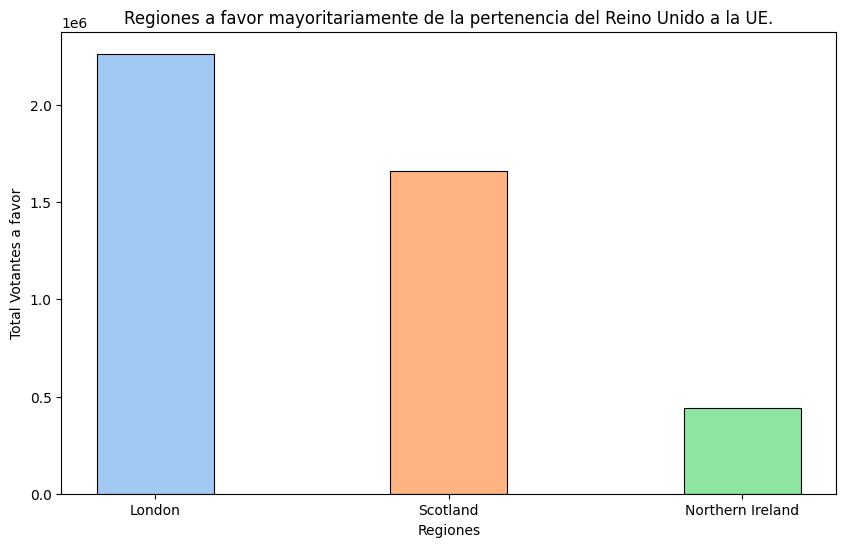

In [319]:
x_favor=dt_temporal[["Region","Remain"]][dt_temporal.Leave < dt_temporal.Remain]
figure(figsize=(10,6))
color=color_palette("pastel",12)
bar(x_favor.Region,x_favor["Remain"], color=color,width=0.4, linewidth=0.8, edgecolor="black")
title("Regiones a favor mayoritariamente de la pertenencia del Reino Unido a la UE.")
ylabel("Total Votantes a favor")
xlabel("Regiones")

"Calcular los porcentajes"

Text(0.5, 1.0, '% Favorabilidad sobre la pertenencia del Reino Unido a la UE.')

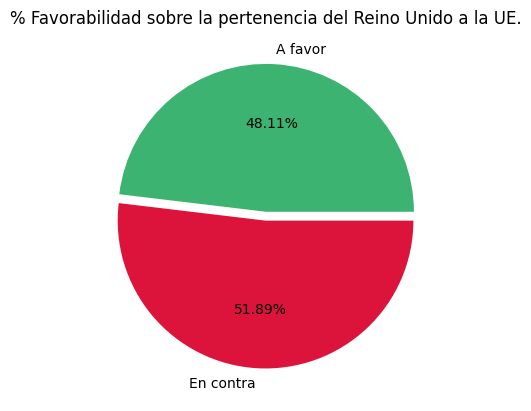

In [320]:

from pandas import Series
from seaborn import color_palette
from matplotlib.pyplot import bar,legend,xticks,figure,title,ylabel,xlabel
from matplotlib.pyplot import pie
serie_total=dt_temporal.loc[:,"Remain":"Leave"].sum()
label=["A favor","En contra"]
explode=[0.03,0.03]
pie(serie_total, autopct="%0.2f%%",explode=explode,colors=["mediumseagreen","crimson"],labels=label)
title("% Favorabilidad sobre la pertenencia del Reino Unido a la UE.")


In [321]:
dt_temporal["pct_remain"]=dt_temporal["Remain"]*100/(dt_temporal["Remain"]+dt_temporal["Leave"])
dt_temporal["pct_leave"]=dt_temporal["Leave"]*100/(dt_temporal["Remain"]+dt_temporal["Leave"])
dt_temporal.drop("index", axis="columns", inplace=True)
dt_temporal

,Region,Remain,Leave,pct_remain,pct_leave
7,South East,2391718,2567965,48.223203,51.776797
4,North West,1699020,1966925,46.346031,53.653969
0,East,1448616,1880367,43.515272,56.484728
10,West Midlands,1207175,1755687,40.743545,59.256455
8,South West,1503019,1669711,47.373051,52.626949
11,Yorkshire and The Humber,1158298,1580937,42.285456,57.714544
2,London,2263519,1513232,59.932969,40.067031
1,East Midlands,1033036,1475479,41.181177,58.818823
6,Scotland,1661191,1018322,61.996004,38.003996
9,Wales,772347,854572,47.472984,52.527016


"""Calcular el censo, porcentaje de votantes y rechazados."""

In [322]:

dt_censo=dt.groupby(["Region"])["Electorate","Rejected_Ballots","Votes_Cast"].sum().reset_index()
dt_censo

<ipython-input-322-600464f2e343>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt_censo=dt.groupby(["Region"])["Electorate","Rejected_Ballots","Votes_Cast"].sum().reset_index()


,Region,Electorate,Rejected_Ballots,Votes_Cast
0,East,4398796,2329,3331312
1,East Midlands,3384299,1981,2510496
2,London,5424768,4453,3781204
3,North East,1934341,689,1341387
4,North West,5241568,2682,3668627
5,Northern Ireland,1260955,374,790523
6,Scotland,3987112,1666,2681179
7,South East,6465404,3427,4963110
8,South West,4138134,2179,3174909
9,Wales,2270272,1135,1628054


In [323]:
censo=0
censo=dt_censo.loc[:,"Electorate"].sum()
censo
print("El censo electoral es de:",censo)

El censo electoral es de: 46500001


Text(0.5, 0, 'Población')

<Figure size 1500x500 with 0 Axes>

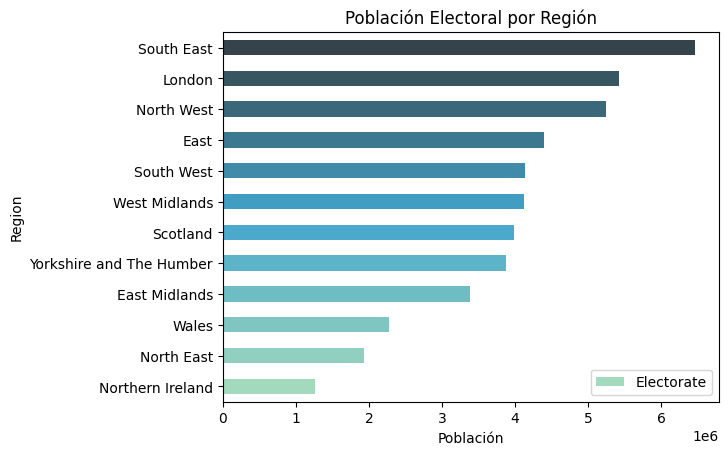

In [324]:
from seaborn import barplot,color_palette
from matplotlib.pyplot import plot

figure(figsize=(15,5))
colorx=color_palette("GnBu_d",12)
dt_censo.sort_values(by="Electorate").plot("Region","Electorate", width=0.5, kind="barh",color=colorx)
title("Población Electoral por Región")
xlabel("Población")

In [325]:
dt_censo["pct_Votes_Cast"]=dt_censo["Votes_Cast"]*100/dt_censo["Electorate"]
dt_censo["pct_Votes_Rejected"]=dt_censo["Rejected_Ballots"]*100/dt_censo["Votes_Cast"]
dt_censo

,Region,Electorate,Rejected_Ballots,Votes_Cast,pct_Votes_Cast,pct_Votes_Rejected
0,East,4398796,2329,3331312,75.732359,0.069912
1,East Midlands,3384299,1981,2510496,74.180680,0.078909
2,London,5424768,4453,3781204,69.702594,0.117767
3,North East,1934341,689,1341387,69.345943,0.051365
4,North West,5241568,2682,3668627,69.991022,0.073106
5,Northern Ireland,1260955,374,790523,62.692404,0.047310
6,Scotland,3987112,1666,2681179,67.246142,0.062137
7,South East,6465404,3427,4963110,76.764112,0.069049
8,South West,4138134,2179,3174909,76.723204,0.068632
9,Wales,2270272,1135,1628054,71.711848,0.069715


Text(0.5, 0, '% Votantes')

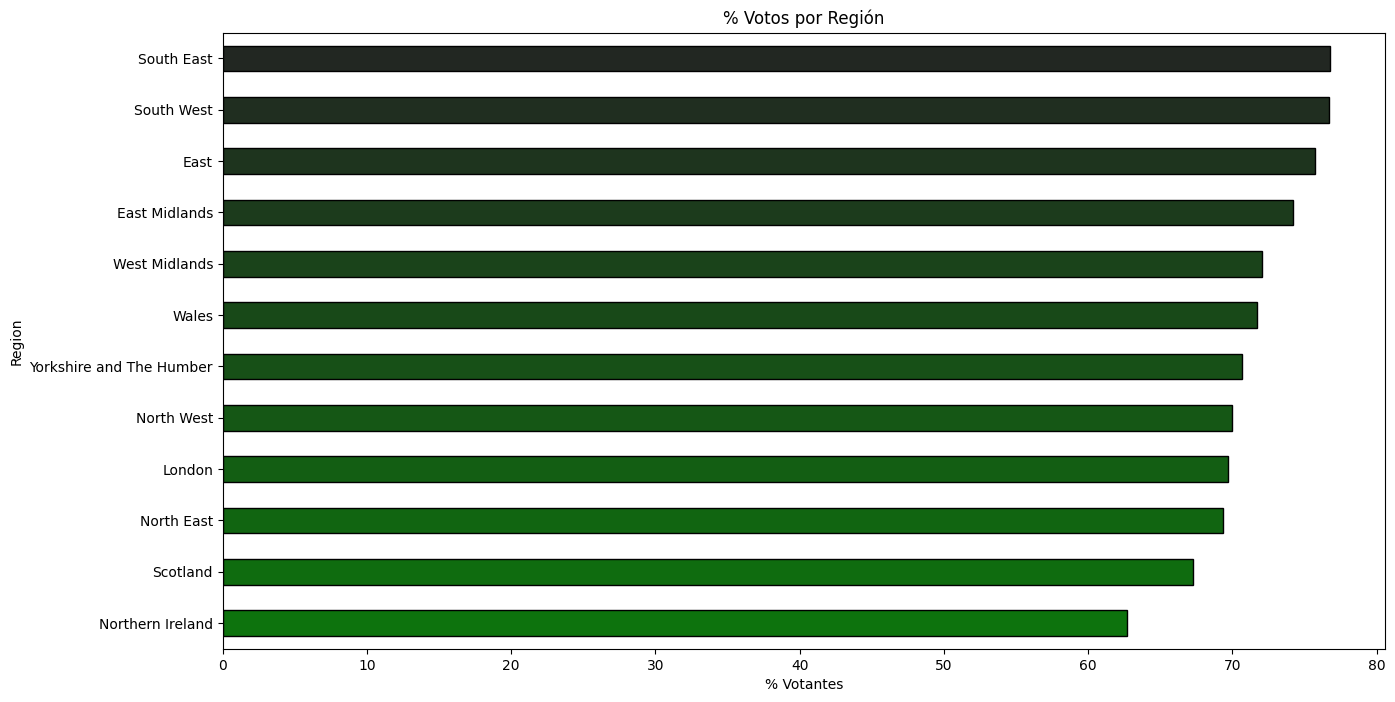

In [326]:

from matplotlib.pyplot import barh
from seaborn import dark_palette
figure(figsize=(15,8))
barplot(data=dt_censo,x="pct_Votes_Cast",y="Region",palette=dark_palette("green",12),linewidth=1,width=0.5,
saturation=0.8,edgecolor="black",order=dt_censo.sort_values(by="pct_Votes_Cast",ascending=False)["Region"])
title("% Votos por Región")
xlabel("% Votantes")

Text(0.5, 0, '% Votos Rechazados')

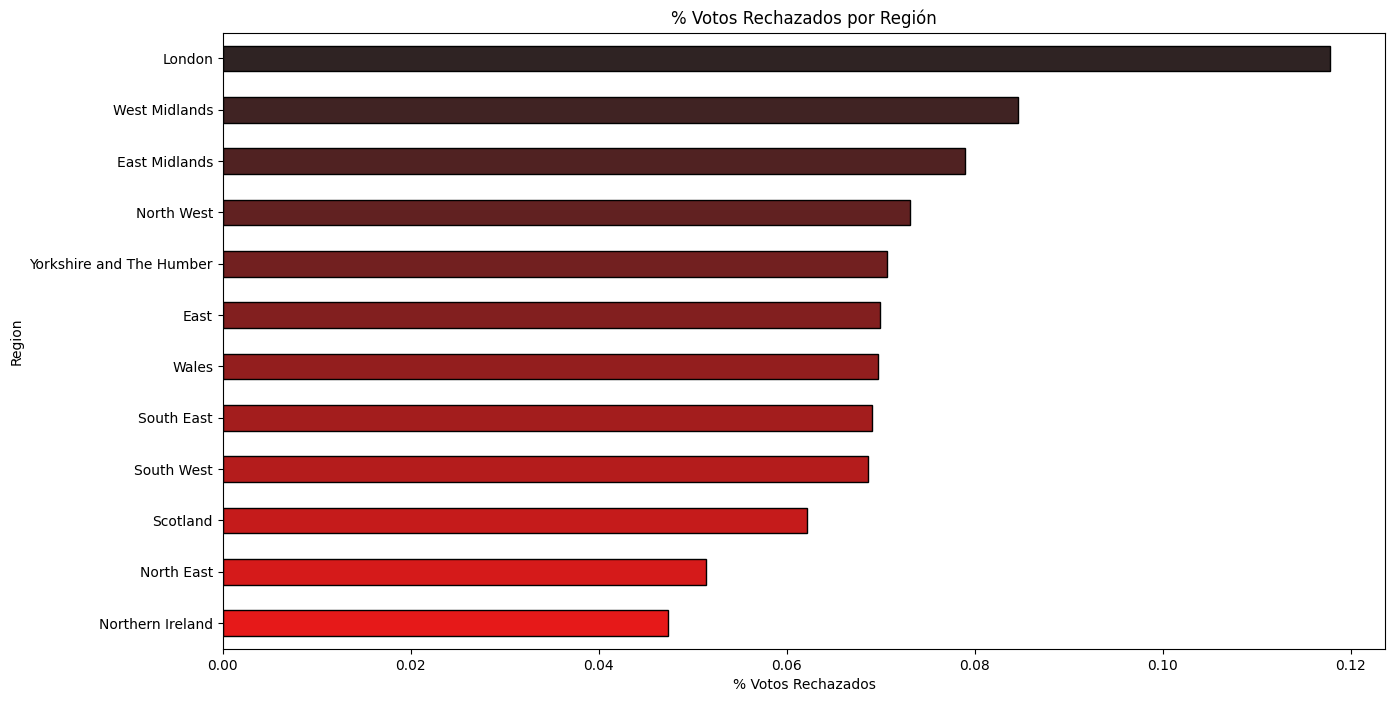

In [327]:
from seaborn import barplot,color_palette,dark_palette
figure(figsize=(15,8))
barplot(data=dt_censo,x="pct_Votes_Rejected",y="Region",palette=dark_palette("red",12),linewidth=1,width=0.5,
saturation=0.8,edgecolor="black",order=dt_censo.sort_values(by="pct_Votes_Rejected",ascending=False)["Region"])
title("% Votos Rechazados por Región")
xlabel("% Votos Rechazados")


"""¿Cuáles serán los condados más a favor de la UE y cuáles serán menos?"""

Text(49, Northern Ireland, '55%')

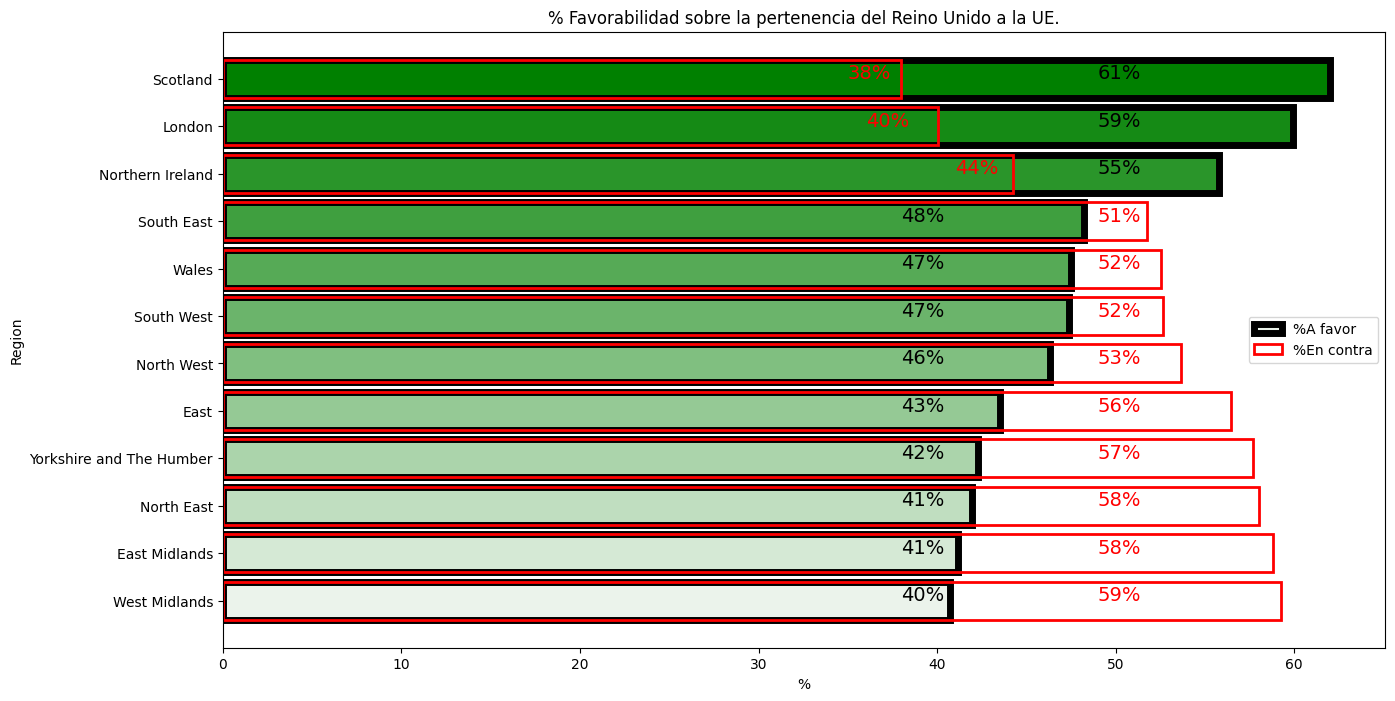

In [328]:

from seaborn import light_palette
from matplotlib.pyplot import barh,text
dt_temporal=dt_temporal.sort_values(by="pct_remain", ascending=True)
figure(figsize=(15,8))
x=dt_temporal["Region"]
y1=dt_temporal["pct_remain"]
y2=dt_temporal["pct_leave"]
col1=light_palette("green",12)
barh(x,y1,color=col1, edgecolor="black",linewidth=5)
barh(x,y2,facecolor=(0,0,0,0), edgecolor="red", linewidth=2)
title("% Favorabilidad sobre la pertenencia del Reino Unido a la UE.")
xlabel("%")
ylabel("Region")
legend(["%A favor","%En contra"])

#creando una funciòn para colocar como textos a los valores de los porcentajes
def texto_bar(pos_x,pos_y,texto,color):
 for y,t in zip(pos_y,texto):
   if(y not in ["Scotland","London","Northern Ireland"]):
    m="{}%".format(t)
    text(pos_x, y, m, color=color, size=14)

yx1=dt_temporal["pct_remain_rounded"]=dt_temporal["pct_remain"].astype("int")
yx2=dt_temporal["pct_leave_rounded"]=dt_temporal["pct_leave"].astype("int")

texto_bar(49,dt_temporal["Region"],yx2,"red") 
texto_bar(38,dt_temporal["Region"],yx1,"black") 

text(35, "Scotland", "38%", color="red", size=14)
text(36, "London", "40%", color="red", size=14)
text(41, "Northern Ireland", "44%", color="red", size=14)

text(49, "Scotland", "61%", color="black", size=14)
text(49, "London", "59%", color="black", size=14)
text(49, "Northern Ireland", "55%", color="black", size=14)
#opte por un gráfico de barras superpuestas
#Se observa en el gráfico que las regiones de mayor favorabilidad son Scotland, London y Northern Ireland. Los que tienen menos favorabilidad son West Midlands,East Midlands, North East

Ver influencias de las siguientes variables:
Edad.
Nivel de educación.
Gente de RU que no vive en RU.
Ingresos salariales.
Gente sin trabajo.

In [329]:
"""Trabajando con el segundo excel para averiguar los ingresos, usarè la mediana ya que se observa una gran dispersiòn debido a que esta bien alejada de la media"""

from pandas import read_excel,ExcelFile
xls = ExcelFile("/content/NS_Table_3_13_1415.xlsx")
sheets = xls.sheet_names
print(sheets)
dt_income=read_excel("/content/NS_Table_3_13_1415.xlsx", index_col=[0], sheet_name="Table 3.13",header=[6,9])
dt_income.dropna(0,how="all",inplace=True)#elimino todas las filas que tienen solo nulos
dt_income.dropna(1,how="all",inplace=True)#elimino todas las columnas que tienen solo nulos
#,"North West","Yorkshire and the Humber","East Midlands","West Midlands","East of England","London","South East","South West","Wales","Scotland","Northern Ireland"
dt_income=dt_income.loc[["North East ","North West ","Yorkshire and the Humber","East Midlands","West Midlands","East of England","London ","South East ","South West ","Wales","Scotland","Northern Ireland"],:]
dt_income.rename(index={"North East ":"North East","North West ":"North West","London ":"London","South East ":"South East","South West ":"South West"},inplace=True)
dt_income.index=dt_income.index.str.capitalize()
dt_temporal["Region"]=dt_temporal["Region"].str.capitalize()
dt_income


['Table 3.13']


<ipython-input-329-cd32999f468f>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_income.dropna(0,how="all",inplace=True)#elimino todas las filas que tienen solo nulos
<ipython-input-329-cd32999f468f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_income.dropna(1,how="all",inplace=True)#elimino todas las columnas que tienen solo nulos


County                   Self employment income                    \
                             No. of individuals     Mean   Median   
                                                                    
North east                                 84.0  17900.0  11800.0   
North west                                282.0  18800.0  12000.0   
Yorkshire and the humber                  228.0  19100.0  12400.0   
East midlands                             204.0  18500.0  12400.0   
West midlands                             240.0  18500.0  12000.0   
East of england                           363.0  23300.0  13300.0   
London                                    556.0  37000.0  14100.0   
South east                                548.0  24500.0  13100.0   
South west                                346.0  18500.0  12100.0   
Wales                                     134.0  16400.0  11200.0   
Scotland                                  230.0  22400.0  12000.0   
Northern ireland                           95.0  18400.0  11500.0   

County                    Employment income                    \
                         No. of individuals     Mean   Median   
                                                                
North east                            853.0  25000.0  20300.0   
North west                           2460.0  25600.0  20100.0   
Yorkshire and the humber             1820.0  24900.0  20000.0   
East midlands                        1630.0  25900.0  20200.0   
West midlands                        1930.0  25500.0  20200.0   
East of england                      2200.0  30200.0  21900.0   
London                               3220.0  39400.0  25200.0   
South east                           3330.0  32800.0  22700.0   
South west                           1940.0  25300.0  19800.0   
Wales                                 991.0  24400.0  20200.0   
Scotland                             2010.0  27400.0  21300.0   
Northern ireland                      579.0  23600.0  19900.0   

County                       Pension income                    \
                         No. of individuals     Mean   Median   
                                                                
North east                            340.0  15100.0  13500.0   
North west                            926.0  15800.0  13600.0   
Yorkshire and the humber              692.0  15400.0  13600.0   
East midlands                         637.0  15500.0  13500.0   
West midlands                         730.0  15200.0  13200.0   
East of england                       856.0  16800.0  14000.0   
London                                671.0  17800.0  14100.0   
South east                           1320.0  18300.0  14600.0   
South west                            887.0  16400.0  13800.0   
Wales                                 428.0  15500.0  13600.0   
Scotland                              738.0  16000.0  13700.0   
Northern ireland                      174.0  15600.0  13100.0   

County                   Property, interest, dividend and other income  \
                                                    No. of individuals   
                                                                         
North east                                                       979.0   
North west                                                      2800.0   
Yorkshire and the humber                                        2060.0   
East midlands                                                   1880.0   
West midlands                                                   2200.0   
East of england                                                 2550.0   
London                                                          3290.0   
South east                                                      3870.0   
South west                                                      2340.0   
Wales                                                           1170.0   
Scotland                                          

In [330]:
from pandas import merge
dt_income_graph=[]
dt_income_graph=dt_income.loc[:,("Total income","Median")].reset_index()
dt_income_graph.drop("",axis=1,inplace=True)
dt_income_graph["Region"]=dt_income.index
dt_income_graph=dt_income_graph.droplevel(level=1, axis=1)
dt_income_graph['Region'].replace({"East of england":"East"},inplace=True)
dt_income_graph=merge(dt_income_graph,dt_temporal,on="Region",how="inner")
dt_income_graph


<ipython-input-330-404559cdd17c>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dt_income_graph.drop("",axis=1,inplace=True)


,Total income,Region,Remain,Leave,pct_remain,pct_leave,pct_remain_rounded,pct_leave_rounded
0,20800.0,North east,562595,778103,41.962843,58.037157,41,58
1,21100.0,North west,1699020,1966925,46.346031,53.653969,46,53
2,21000.0,Yorkshire and the humber,1158298,1580937,42.285456,57.714544,42,57
3,21200.0,East midlands,1033036,1475479,41.181177,58.818823,41,58
4,20900.0,West midlands,1207175,1755687,40.743545,59.256455,40,59
5,23200.0,East,1448616,1880367,43.515272,56.484728,43,56
6,26400.0,London,2263519,1513232,59.932969,40.067031,59,40
7,24400.0,South east,2391718,2567965,48.223203,51.776797,48,51
8,21600.0,South west,1503019,1669711,47.373051,52.626949,47,52
9,21000.0,Wales,772347,854572,47.472984,52.527016,47,52


<ipython-input-331-2a18b64a2dea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_income=dt_income_graph.corr()


Text(0, 0.5, 'Total Ingresos')

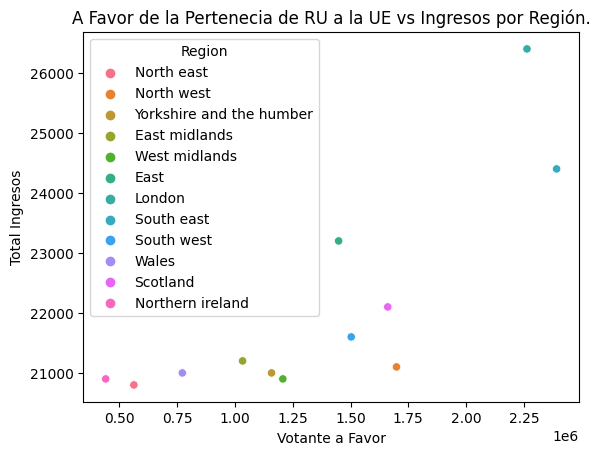

In [331]:
from seaborn import scatterplot
scatterplot(data=dt_income_graph,x="Remain",y="Total income",hue="Region")
corr_income=dt_income_graph.corr()
title("A Favor de la Pertenecia de RU a la UE vs Ingresos por Región.")
xlabel("Votante a Favor")
ylabel("Total Ingresos")

<ipython-input-332-538dd9bc47f0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_income=dt_income_graph.corr()


Text(0, 0.5, 'Total Ingresos')

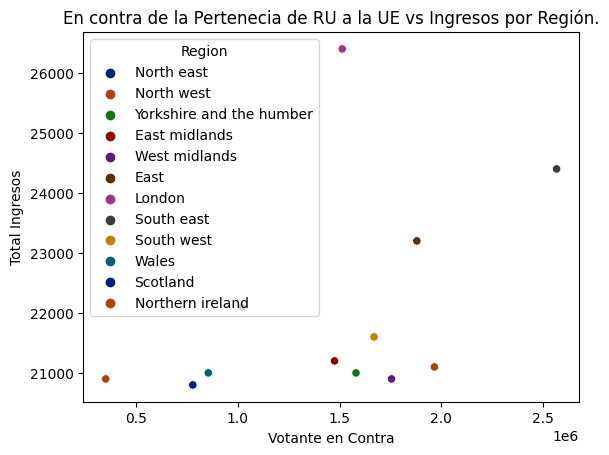

In [332]:
from seaborn import scatterplot
colors=color_palette("dark",12)
scatterplot(data=dt_income_graph,x="Leave",y="Total income",hue="Region",palette=colors)
corr_income=dt_income_graph.corr()
title("En contra de la Pertenecia de RU a la UE vs Ingresos por Región.")
xlabel("Votante en Contra")
ylabel("Total Ingresos")

Text(0.5, 1.0, 'Correlación de Variables')

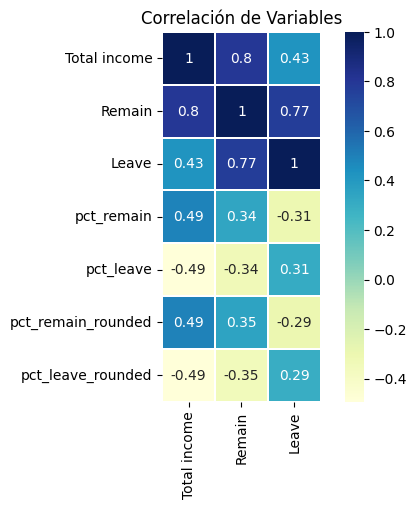

In [333]:
from seaborn import heatmap
heatmap(corr_income.loc[:,["Total income","Remain","Leave"]],vmax=1, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
title("Correlación de Variables")
#se puede observar una relativamente alta correlación positiva entre los ingresos con respecto a la favorabilidad positiva de las regiones, lo cual indica que en regiones donde hay ingresos más altos, 
#tambien se presentan más votos a favor, así mismo en regiones donde hay votos a favor menores aparecen ingresos menores a otras regiones, diferente a los votos en contra cuya correlación es relativamente baja, 
#no se presenta un comportamiento que lo relacione con los ingresos.

In [334]:
"""Trabajando el siguiente excel para obtener las edades"""
from pandas import read_excel,ExcelFile
xt=ExcelFile("/content/r21ewrttableks102ewladv1_tcm77-290566.xls")
print(xt.sheet_names) #['Information', 'KS102EW_Numbers', 'KS102EW_Percentages', 'KS102EW_Ranks', 'Metadata']
dt_edades=read_excel("/content/r21ewrttableks102ewladv1_tcm77-290566.xls",sheet_name="KS102EW_Numbers",header=[10],index_col=0)
dt_edades.dropna(0,how="all",inplace=True)
dt_edades.dropna(1,how="all",inplace=True)
dt_edades.loc[:,"Area name"]=dt_edades.loc[:,"Area name"].str.capitalize()
dt_edades[dt_edades["Area name"].notnull()]["Area name"]



['Information', 'KS102EW_Numbers', 'KS102EW_Percentages', 'KS102EW_Ranks', 'Metadata']


<ipython-input-334-a210ae4aa418>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_edades.dropna(0,how="all",inplace=True)
<ipython-input-334-a210ae4aa418>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_edades.dropna(1,how="all",inplace=True)


Area code
K04000001           England and wales
E92000001                     England
E12000001                  North east
NaN                                  
E12000002                 North west 
E12000003    Yorkshire and the humber
E12000004               East midlands
E12000005               West midlands
E12000006                        East
E12000007                      London
E12000008                  South east
E12000009                  South west
W92000004                       Wales
Name: Area name, dtype: object

In [335]:
dt_income_graph["Region"]=dt_income_graph["Region"].str.capitalize()
dt_edades_graph=merge(dt_edades,dt_income_graph,left_on="Area name",right_on="Region",how="inner")
dt_edades_graph["Mean age"]=dt_edades_graph["Mean age"].astype("float64")
dt_edades_graph

,Area name,Unnamed: 2,Unnamed: 3,All categories: Age,Age 0 to 4,Age 5 to 7,Age 8 to 9,Age 10 to 14,Age 15,Age 16 to 17,Age 18 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 44,Age 45 to 59,Age 60 to 64,Age 65 to 74,Age 75 to 84,Age 85 to 89,Age 90 and over,Mean age,Median age,Total income,Region,Remain,Leave,pct_remain,pct_leave,pct_remain_rounded,pct_leave_rounded
0,North east,NaN,NaN,2596886,149843,83689,52610,145045,31250,63605,74585,184018,164303,491533,538344,168576,239242,154863,37546,17834,40.3,41,20800.0,North east,562595,778103,41.962843,58.037157,41,58
1,Yorkshire and the humber,NaN,NaN,5283733,328447,182818,114657,306096,65774,130943,151928,382679,347304,1042121,1031066,325329,463849,296421,75868,38433,39.4,39,21000.0,Yorkshire and the humber,1158298,1580937,42.285456,57.714544,42,57
2,East midlands,NaN,NaN,4533222,270174,151534,96030,264538,56179,114815,124920,307676,278581,895538,908888,291401,414713,256569,67862,33804,40.0,40,21200.0,East midlands,1033036,1475479,41.181177,58.818823,41,58
3,West midlands,NaN,NaN,5601847,354801,200808,126252,340758,71823,146021,151468,380909,363286,1109645,1074836,335265,505689,316994,82016,41276,39.3,39,20900.0,West midlands,1207175,1755687,40.743545,59.256455,40,59
4,East,NaN,NaN,5846965,361269,201093,127419,345453,73398,148076,137223,352974,362643,1183973,1156696,372566,531393,350137,93653,48999,40.2,40,23200.0,East,1448616,1880367,43.515272,56.484728,43,56
5,London,NaN,NaN,8173941,591495,301095,181714,456865,93599,186626,191434,629972,832966,2070954,1389882,342590,473058,308661,80574,42456,35.6,33,26400.0,London,2263519,1513232,59.932969,40.067031,59,40
6,South east,NaN,NaN,8634750,534235,299327,188731,512875,106916,217612,217156,534287,528057,1761278,1716857,535399,763695,501118,139576,77631,40.0,40,24400.0,South east,2391718,2567965,48.223203,51.776797,48,51
7,South west,NaN,NaN,5288935,296094,166138,106551,296892,64003,128935,135139,333166,307159,994693,1063214,361507,532902,348759,99900,53883,41.6,42,21600.0,South west,1503019,1669711,47.373051,52.626949,47,52
8,Wales,NaN,NaN,3063456,178301,99429,63650,177748,37168,77111,84841,211924,185728,570894,609233,204885,300550,187434,49360,25200,40.6,41,21000.0,Wales,772347,854572,47.472984,52.527016,47,52


Text(0, 0.5, 'Votantes a favor')

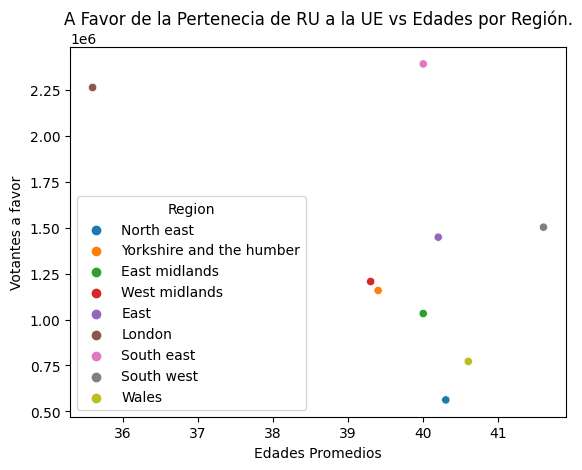

In [336]:
from seaborn import scatterplot
scatterplot(data=dt_edades_graph,y="Remain",x="Mean age",hue="Region")
title("A Favor de la Pertenecia de RU a la UE vs Edades por Región.")
xlabel("Edades Promedios")
ylabel("Votantes a favor")

<ipython-input-337-8012e31950d1>:3: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  scatterplot(data=dt_edades_graph,y="Leave",x="Mean age",hue="Region",palette=colors)


Text(0, 0.5, 'Votantes en Contra')

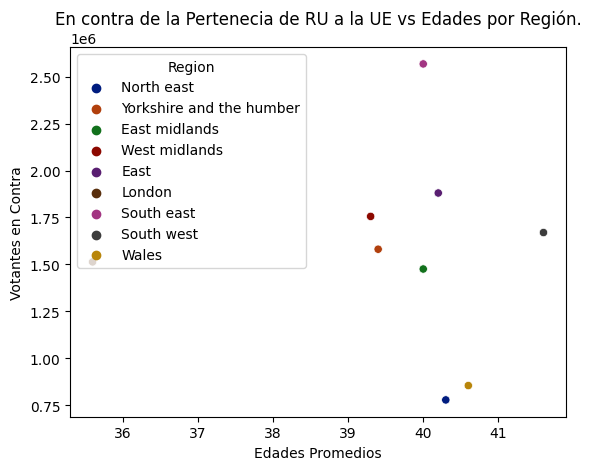

In [337]:
from seaborn import scatterplot
colors=color_palette("dark",12)
scatterplot(data=dt_edades_graph,y="Leave",x="Mean age",hue="Region",palette=colors)
title("En contra de la Pertenecia de RU a la UE vs Edades por Región.")
xlabel("Edades Promedios")
ylabel("Votantes en Contra")

<ipython-input-338-29d3628df221>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_edades=dt_edades_graph.corr()


Text(0.5, 1.0, 'Correlación de Variables')

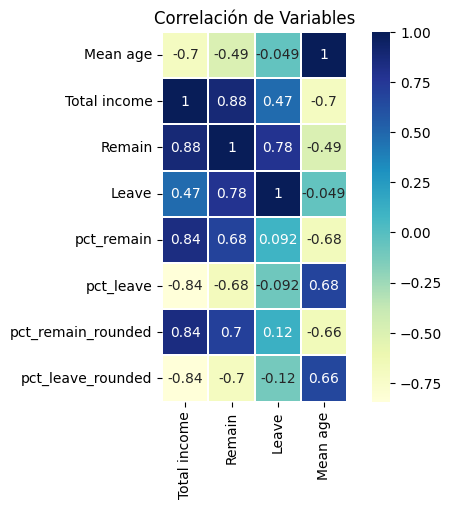

In [338]:
corr_edades=dt_edades_graph.corr()
heatmap(corr_edades.loc[:,["Total income","Remain","Leave","Mean age"]],vmax=1, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
title("Correlación de Variables")
#Se observa una correlación relativamente baja entre las edades promedio y la cantidad de votantes por regiones a favor.

In [339]:
"""Analizando otro excel"""
from pandas import set_option
set_option("display.max_columns",None)
set_option("max_colwidth",None)
xt=ExcelFile("/content/r21ewrttableks501ewladv1_tcm77-290734.xls")
print(xt.sheet_names)
dt_education=read_excel("/content/r21ewrttableks501ewladv1_tcm77-290734.xls",sheet_name="KS501EW_Numbers",header=10,index_col=0)
dt_education.dropna(0,how="all",inplace=True)
dt_education.dropna(1,how="all",inplace=True)
dt_education["Area name"]=dt_education["Area name"].str.capitalize()
dt_education.head(50)

['Information', 'KS501EW_Numbers', 'KS501EW_Percentages', 'KS501EW_Ranks', 'Metadata']


<ipython-input-339-183569820bcc>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_education.dropna(0,how="all",inplace=True)
<ipython-input-339-183569820bcc>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_education.dropna(1,how="all",inplace=True)


,Area name,Unnamed: 2,Unnamed: 3,All categories: Highest level of qualification,No qualifications,Highest level of qualification: Level 1 qualifications,Highest level of qualification: Level 2 qualifications,Highest level of qualification: Apprenticeship,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above,Highest level of qualification: Other qualifications,Schoolchildren and full-time students: Age 16 to 17,Schoolchildren and full-time students: Age 18 and over,Full-time students: Age 18 to 74: Economically active: In employment,Full-time students: Age 18 to 74: Economically active: Unemployed,Full-time students: Age 18 to 74: Economically inactive
Area code,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons,Persons
NaN,NaN,NaN,NaN,Number,Number,Number,Number,Number,Number,Number,Number,Number,Number,Number,Number,Number
K04000001,England and wales,NaN,NaN,45496780,10307327,6047384,6938433,1631777,5617802,12383477,2570580,1230368,2485001,836788,219756,1420951
E92000001,England,NaN,NaN,42989620,9656810,5714441,6544614,1532934,5309631,11769361,2461829,1163148,2348197,791902,208518,1340731
E12000001,North east,NaN,NaN,2134449,565208,291852,335926,101328,279693,473382,87060,54991,118055,37675,10243,69765
NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E06000047,NaN,County Durham UA,NaN,425258,116948,57032,67905,17694,57957,91249,16473,10456,23152,6408,1249,15413
E06000005,NaN,Darlington UA,NaN,85357,21179,11445,13568,4350,10883,20244,3688,2337,2247,992,181,1065
E06000001,NaN,Hartlepool UA,NaN,74228,22758,10057,11992,4076,9276,13063,3006,2342,2376,864,289,1209


In [340]:
dt_education_graph=merge(dt_edades_graph,dt_education,on="Area name",how="inner")
dt_education_graph_temporal=dt_education_graph.loc[:,['Highest level of qualification: Level 1 qualifications',
       'Highest level of qualification: Level 2 qualifications',
       'Highest level of qualification: Apprenticeship',
       'Highest level of qualification: Level 3 qualifications',
       'Highest level of qualification: Level 4 qualifications and above',
       'Highest level of qualification: Other qualifications',"No qualifications",'Remain', 'Leave']]
dt_education_graph_temporal=dt_education_graph_temporal.astype("int64")
dt_education_graph_temporal.loc[:,['Area name','Median age','Total income' ]]=dt_education_graph.loc[:,['Area name','Median age','Total income']]
dt_education_graph_temporal.loc[:,['Median age','Total income' ]]=dt_education_graph.loc[:,['Median age','Total income']].astype("float64")
dt_education_graph_temporal.loc[:,'Area name']=dt_education_graph.loc[:,'Area name'].astype("string")
dt_education_graph_temporal


<ipython-input-340-f9d913f7b6a8>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt_education_graph_temporal.loc[:,['Median age','Total income' ]]=dt_education_graph.loc[:,['Median age','Total income']].astype("float64")
<ipython-input-340-f9d913f7b6a8>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt_education_graph_temporal.loc[:,'Area name']=dt_education_graph.loc[:,'Area name'].astype("string")


,Highest level of qualification: Level 1 qualifications,Highest level of qualification: Level 2 qualifications,Highest level of qualification: Apprenticeship,Highest level of qualification: Level 3 qualifications,Highest level of qualification: Level 4 qualifications and above,Highest level of qualification: Other qualifications,No qualifications,Remain,Leave,Area name,Median age,Total income
0,291852,335926,101328,279693,473382,87060,565208,562595,778103,North east,41.0,20800.0
1,581029,662318,181690,547480,998718,210014,1104692,1158298,1580937,Yorkshire and the humber,39.0,21000.0
2,512492,575351,149078,477203,871702,194927,914014,1033036,1475479,East midlands,40.0,21200.0
3,616225,695544,150353,553600,1050404,244485,1196794,1207175,1755687,West midlands,39.0,20900.0
4,693576,769520,177366,557318,1218862,254242,1067449,1448616,1880367,East,40.0,23200.0
5,702687,775928,107665,685508,2470225,654643,1152517,2263519,1513232,London,33.0,26400.0
6,946056,1110706,253423,892915,2093693,361918,1333955,2391718,2567965,South east,40.0,24400.0
7,592963,713983,186398,575085,1193337,194930,902561,1503019,1669711,South west,42.0,21600.0
8,332943,393819,98843,308171,614116,108751,650517,772347,854572,Wales,41.0,21000.0


<ipython-input-341-b69cb8ed06fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_education=dt_education_graph_temporal.corr()


Text(0.5, 1.0, 'Correlación de Variables')

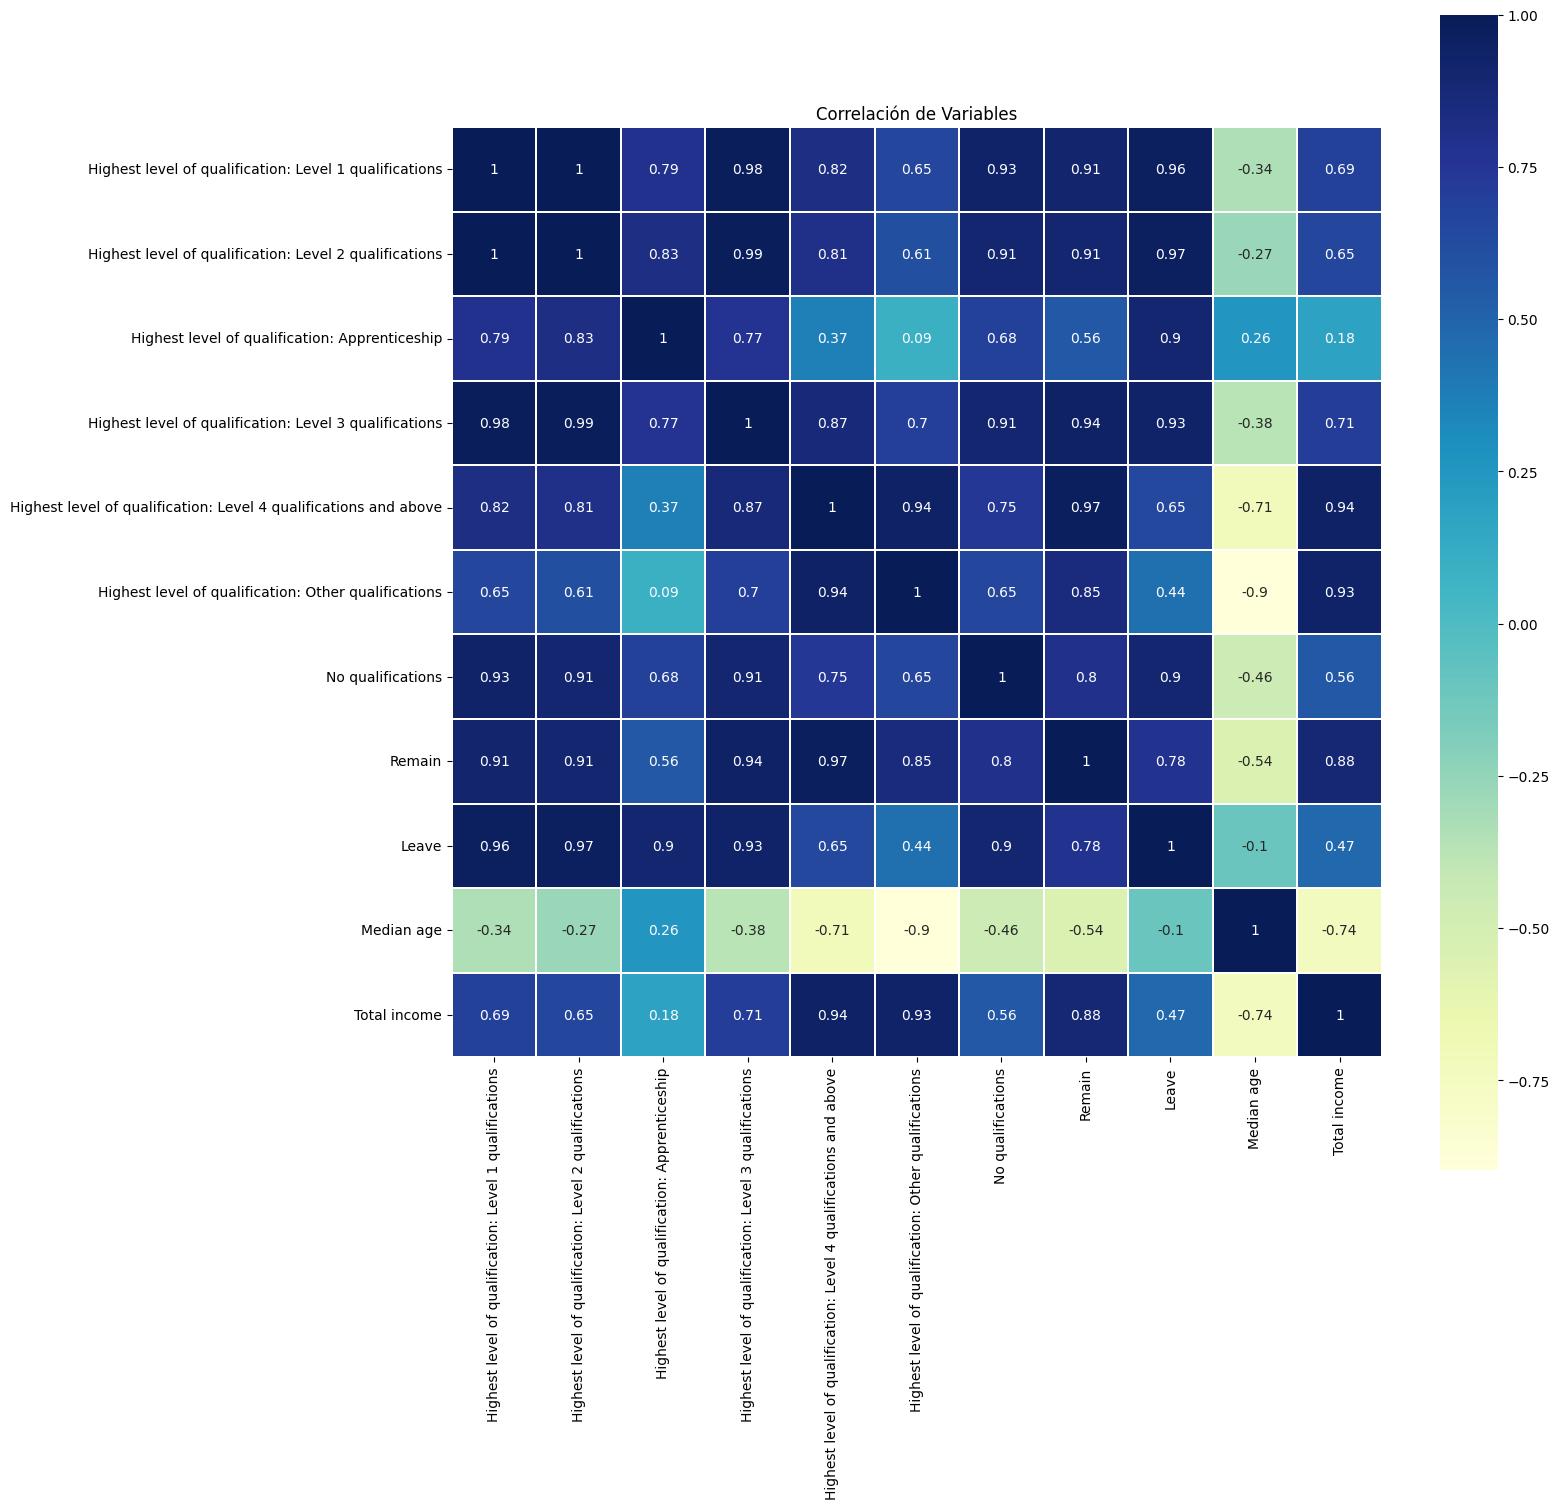

In [341]:
corr_education=dt_education_graph_temporal.corr()
figure(figsize=(15,15))
heatmap(corr_education,vmax=1, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
title("Correlación de Variables")

Text(0.5, 0, 'Nivel 4 de educación o más')

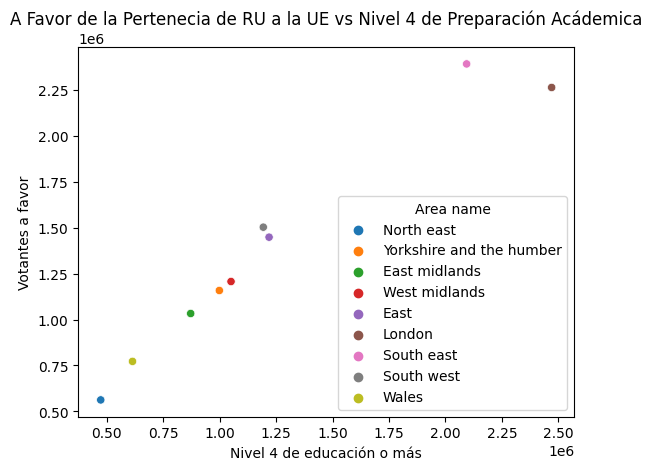

In [342]:
from seaborn import scatterplot
scatterplot(data=dt_education_graph_temporal,x='Highest level of qualification: Level 4 qualifications and above',y='Remain',hue="Area name")
title("A Favor de la Pertenecia de RU a la UE vs Nivel 4 de Preparación Acádemica")
ylabel("Votantes a favor")
xlabel("Nivel 4 de educación o más")
#Se observa que la mayor correlación entre todos los niveles de formación acádemica esta entre el "Highest level of qualification: Level 4 qualifications and above" y el remain.

<ipython-input-343-bc1a9693290f>:3: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  scatterplot(data=dt_education_graph_temporal,x='Highest level of qualification: Level 2 qualifications',y='Leave',hue="Area name", palette=colors)


Text(0.5, 0, 'Nivel 2 de educación o más')

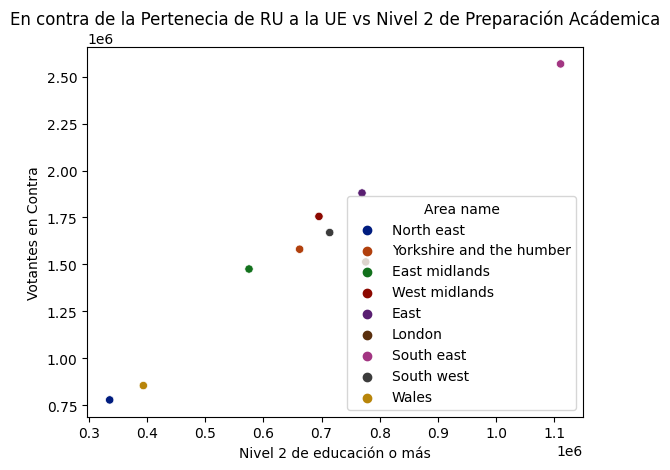

In [343]:
from seaborn import scatterplot
colors=color_palette("dark",12)
scatterplot(data=dt_education_graph_temporal,x='Highest level of qualification: Level 2 qualifications',y='Leave',hue="Area name", palette=colors)
title("En contra de la Pertenecia de RU a la UE vs Nivel 2 de Preparación Acádemica")
ylabel("Votantes en Contra")
xlabel("Nivel 2 de educación o más")
#Se observa que la mayor correlación entre todos los niveles de formación acádemica esta entre el "Highest level of qualification: Level 2 qualifications" y el leave.

In [344]:
"""Analizando otro excel"""
from pandas import set_option
set_option("display.max_columns",None)
set_option("max_colwidth",None)
dt_empleo=ExcelFile("/content/r21ewrttableks601ewladv1_tcm77-290745.xls")
#print(dt_empleo.sheet_names)
dt_empleo=read_excel("/content/r21ewrttableks601ewladv1_tcm77-290745.xls",sheet_name="KS601EW_Numbers",header=10,index_col="Area code")
dt_empleo.dropna(0,how="all",inplace=True)
dt_empleo.dropna(1,how="all",inplace=True)
dt_empleo["Area name"]=dt_empleo["Area name"].str.capitalize()
dt_empleo_graph=merge(dt_empleo,dt_education_graph_temporal,on="Area name",how="inner")

<ipython-input-344-4e3f1f1b0b94>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_empleo.dropna(0,how="all",inplace=True)
<ipython-input-344-4e3f1f1b0b94>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_empleo.dropna(1,how="all",inplace=True)


In [345]:
dt_empleo_graph.columns
dt_empleo_graph.loc[:,["All categories: Economic activity",
       'Economically active: Employee: Part-time',
       'Economically active: Employee: Full-time',
       'Economically active: Self-employed', 'Economically active: Unemployed',
       'Economically active: Full-time student',
       'Economically inactive: Retired',
       'Economically inactive: Student (including full-time students)',
       'Economically inactive: Looking after home or family',
       'Economically inactive: Long-term sick or disabled',
       'Economically inactive: Other', 'Unemployed: Age 16 to 24',
       'Unemployed: Age 50 to 74', 'Unemployed: Never worked',
       "Long-term unemployed" ]]=dt_empleo_graph.loc[:,["All categories: Economic activity",
       'Economically active: Employee: Part-time',
       'Economically active: Employee: Full-time',
       'Economically active: Self-employed', 'Economically active: Unemployed',
       'Economically active: Full-time student',
       'Economically inactive: Retired',
       'Economically inactive: Student (including full-time students)',
       'Economically inactive: Looking after home or family',
       'Economically inactive: Long-term sick or disabled',
       'Economically inactive: Other', 'Unemployed: Age 16 to 24',
       'Unemployed: Age 50 to 74', 'Unemployed: Never worked',
       "Long-term unemployed" ]].astype("int64")
dt_empleo_graph.dropna(axis=1,how="all",inplace=True)
dt_empleo_graph.loc[:,["Area name"]]=dt_empleo_graph.loc[:,["Area name"]].astype("string")
#para la columna de desempleados será la suma de las cuatro categorías que poseen la palabra 'Unemployed"
dt_empleo_graph["Desempleados"]=dt_empleo_graph["Unemployed: Age 16 to 24"]+dt_empleo_graph['Unemployed: Age 50 to 74']+dt_empleo_graph["Long-term unemployed"]+dt_empleo_graph['Unemployed: Never worked']

<ipython-input-345-8c2cb6f67d86>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt_empleo_graph.loc[:,["All categories: Economic activity",
<ipython-input-345-8c2cb6f67d86>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dt_empleo_graph.loc[:,["Area name"]]=dt_empleo_graph.loc[:,["Area name"]].astype("string")


<ipython-input-346-b6cd0a4a1025>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_empleo=dt_empleo_graph.corr()


'En cuanto a la categoría de desempleados se observa una corelación relativamente alta con respecto a los votantes a favor y baja con los de en contra'

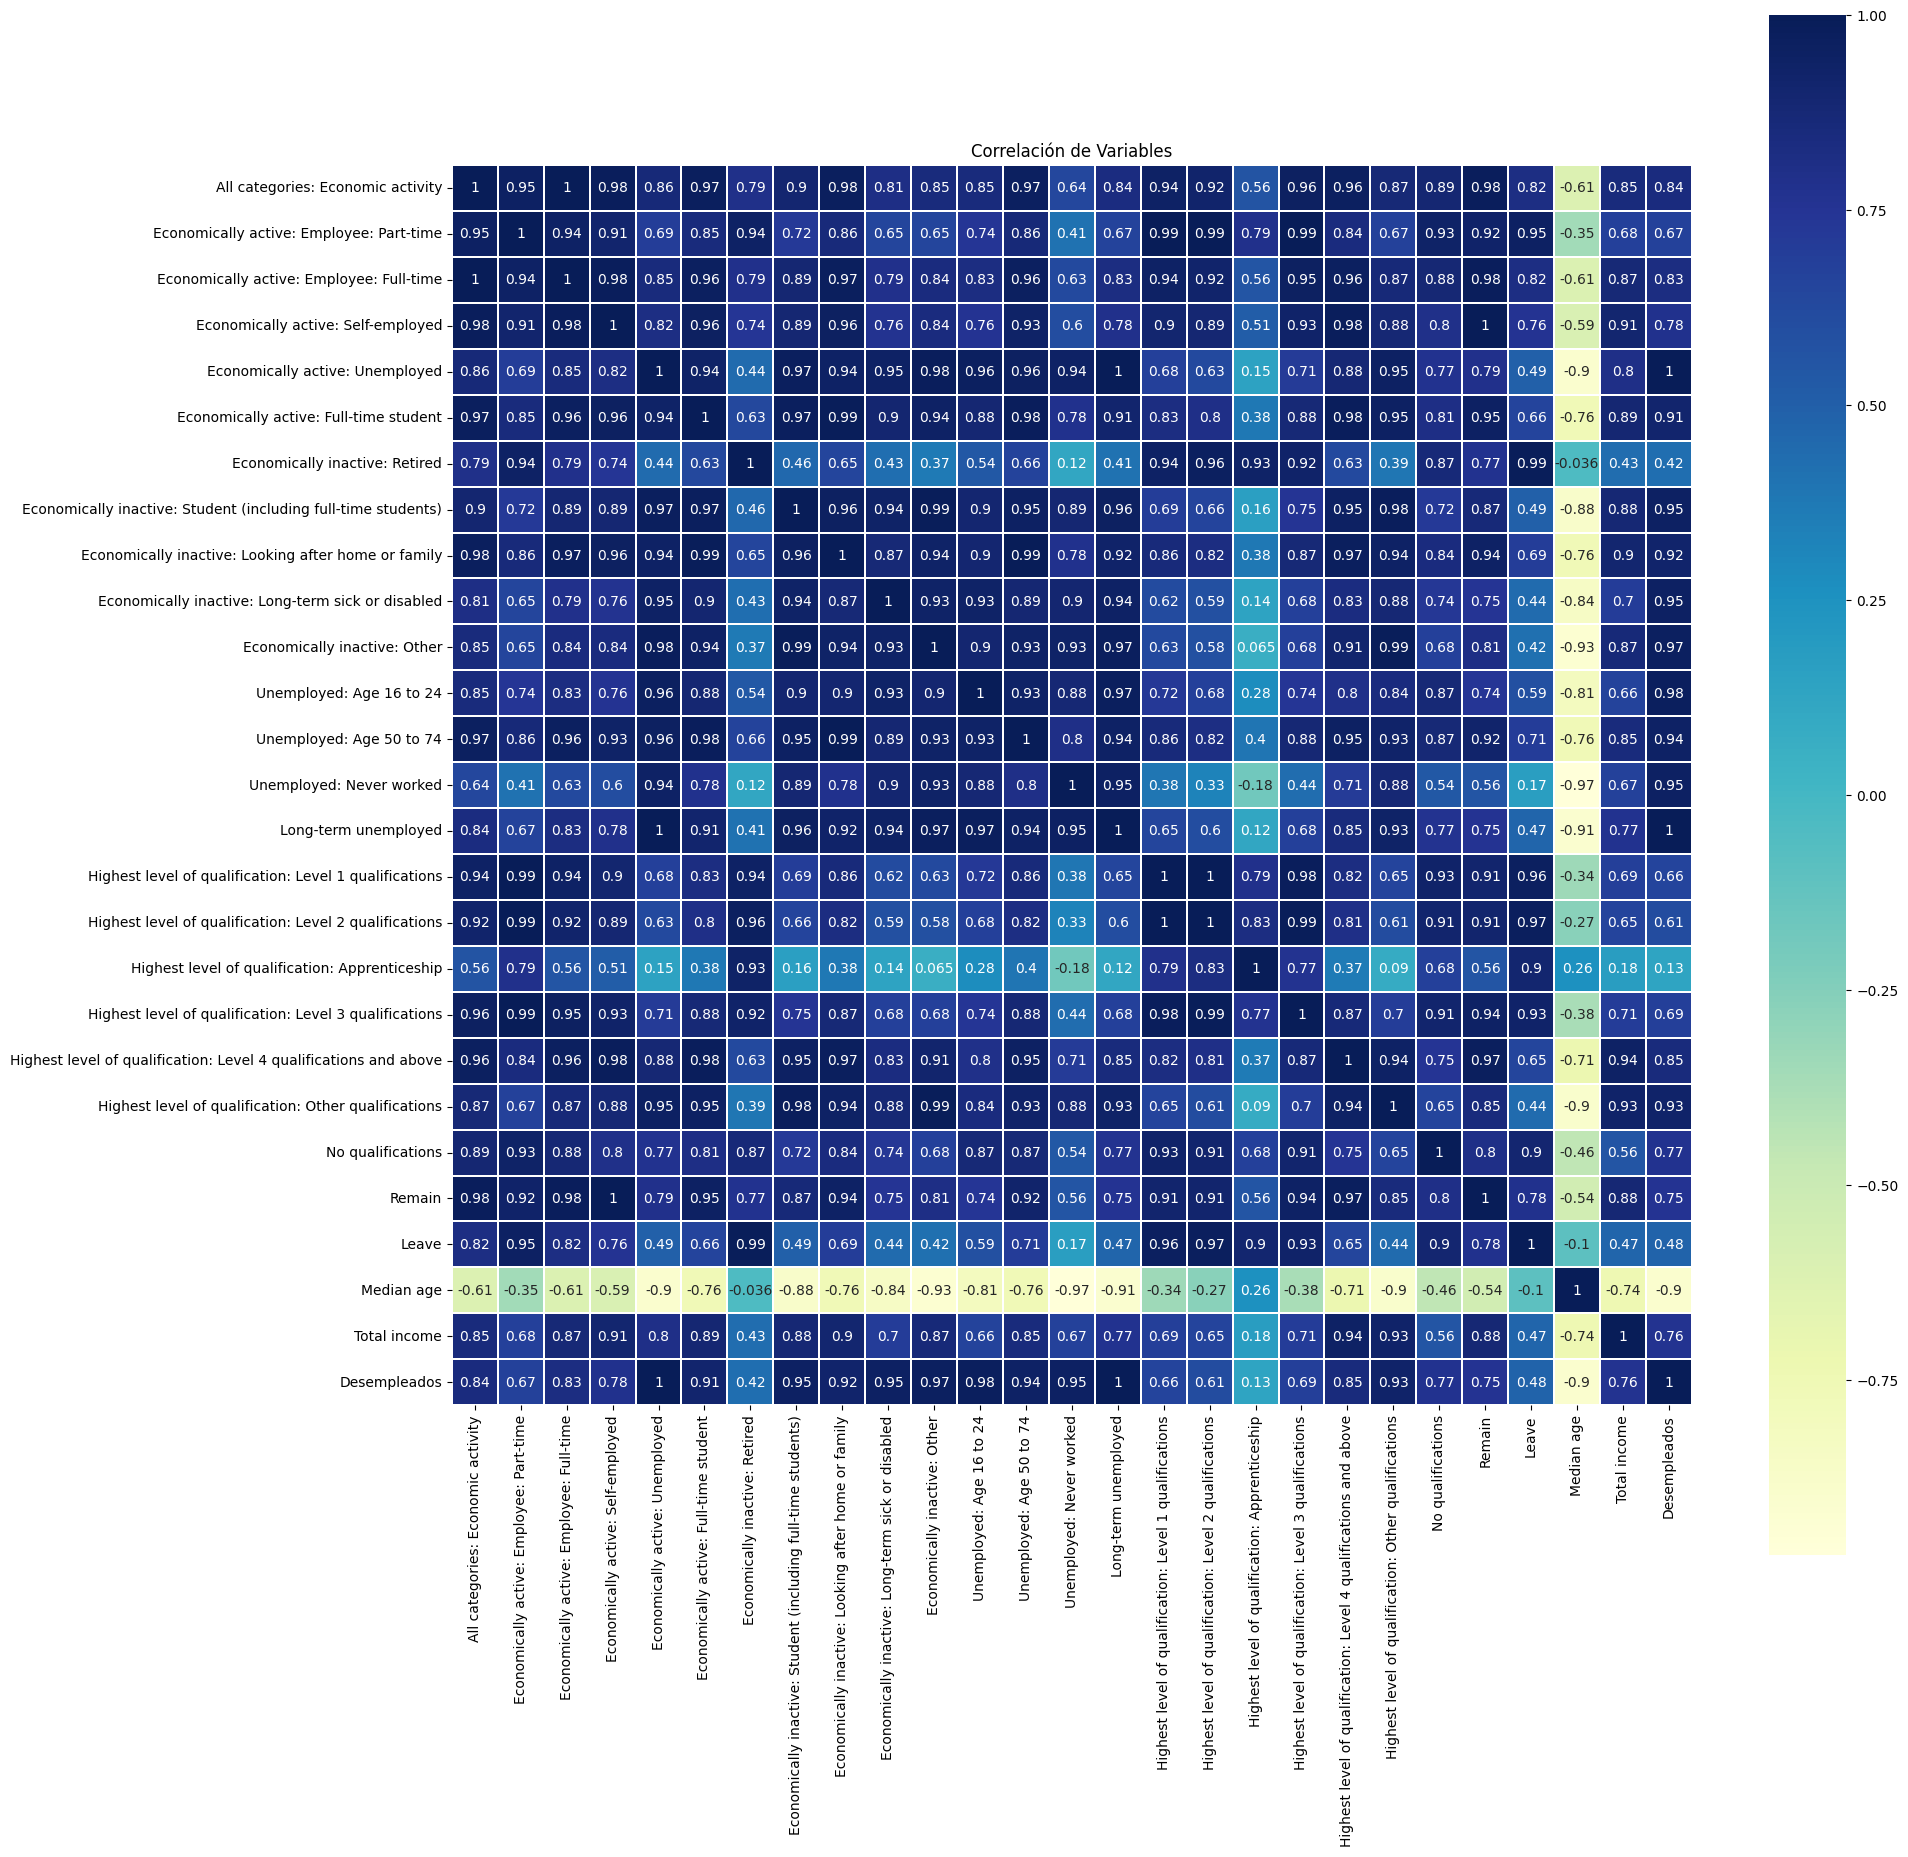

In [346]:
corr_empleo=dt_empleo_graph.corr()
figure(figsize=(20,20))
heatmap(corr_empleo,vmax=1, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
title("Correlación de Variables")

"""se logra observar que los votantes con favorabilidad positiva tienen una muy alta correlación con las categorías: "Economic activity: Self Employed","Economic activity" y "Economically active:Employee:Fulltime
así mismo con la categoría: "Economically inactive: Looking after home or family y Unemployed: Age 50 to 74"
"""
"""En cuanto a la categoría de desempleados se observa una corelación relativamente alta con respecto a los votantes a favor y baja con los de en contra"""


Text(0.5, 0, 'Residentes desempleados')

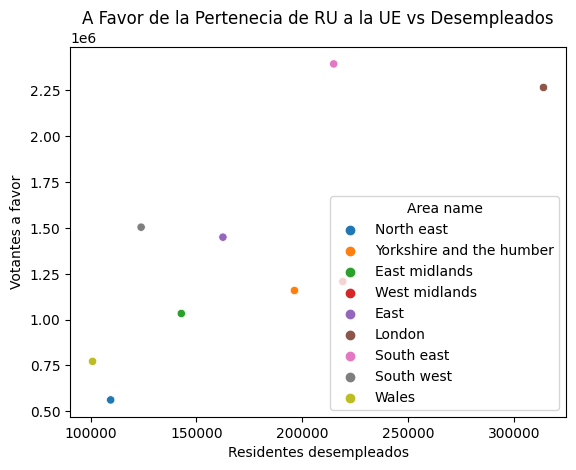

In [347]:
from seaborn import scatterplot
scatterplot(data=dt_empleo_graph,x='Desempleados',y='Remain',hue="Area name")
title("A Favor de la Pertenecia de RU a la UE vs Desempleados")
ylabel("Votantes a favor")
xlabel("Residentes desempleados")

<ipython-input-348-bc06e446e6a3>:3: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  scatterplot(data=dt_empleo_graph,x='Desempleados',y='Leave',hue="Area name", palette=colors)


Text(0.5, 0, 'Residentes desempleados')

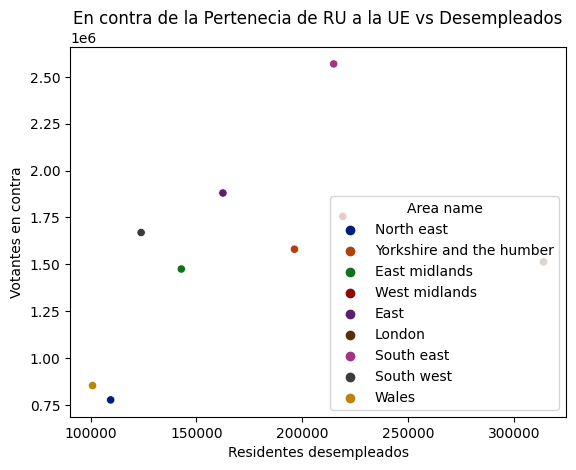

In [348]:
from seaborn import scatterplot
colors=color_palette("dark",12)
scatterplot(data=dt_empleo_graph,x='Desempleados',y='Leave',hue="Area name", palette=colors)
title("En contra de la Pertenecia de RU a la UE vs Desempleados")
ylabel("Votantes en contra")
xlabel("Residentes desempleados")

Text(0.5, 0, 'Residentes con Nivel 4 de educación o más')

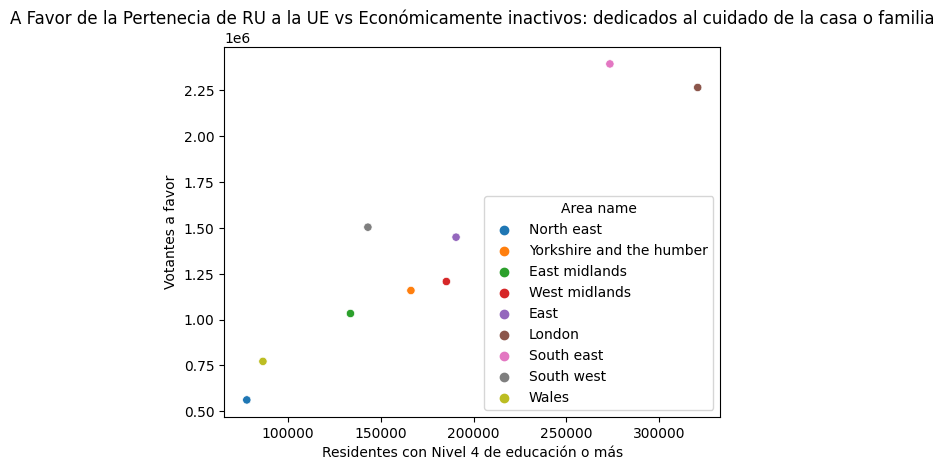

In [349]:
"""Se gráficarán las categorías con mayor correlación"""
from seaborn import scatterplot
scatterplot(data=dt_empleo_graph,x='Economically inactive: Looking after home or family',y='Remain',hue="Area name")
title("A Favor de la Pertenecia de RU a la UE vs Económicamente inactivos: dedicados al cuidado de la casa o familia")
ylabel("Votantes a favor")
xlabel("Residentes con Nivel 4 de educación o más")

Text(0.5, 0, 'Residentes económicamente activos: Empleados por cuenta propia')

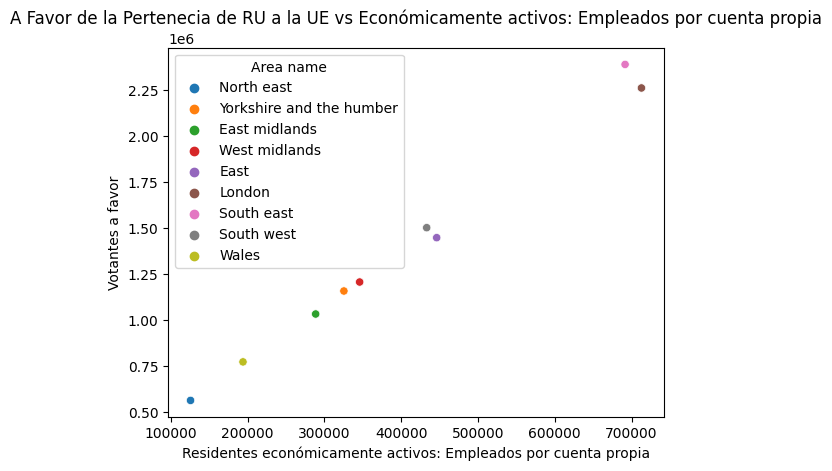

In [350]:
from seaborn import scatterplot
scatterplot(data=dt_empleo_graph,x='Economically active: Self-employed',y='Remain',hue="Area name")
title("A Favor de la Pertenecia de RU a la UE vs Económicamente activos: Empleados por cuenta propia")
ylabel("Votantes a favor")
xlabel("Residentes económicamente activos: Empleados por cuenta propia")

In [351]:
"""Analizando otro excel"""
from pandas import set_option
set_option("display.max_columns",None)
set_option("max_colwidth",None)
dt_place=ExcelFile("/content/r21ewrttableqs203ewladv1_tcm77-290919.xls")
#print(dt_place.sheet_names)
dt_place=read_excel("/content/r21ewrttableqs203ewladv1_tcm77-290919.xls",sheet_name="QS203EW_Numbers",header=10,index_col="Area code")
dt_place.dropna(0,how="all",inplace=True)
dt_place.dropna(1,how="all",inplace=True)
dt_place["Area name"]=dt_place["Area name"].str.capitalize()
dt_place_graph=merge(dt_place,dt_empleo_graph,on="Area name",how="inner")
dt_place_graph.head(50)


<ipython-input-351-c81230a58b6c>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_place.dropna(0,how="all",inplace=True)
<ipython-input-351-c81230a58b6c>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dt_place.dropna(1,how="all",inplace=True)


,Area name,Unnamed: 2,Unnamed: 3,All categories: Country of birth,Europe: Total,Europe: United Kingdom: Total,Europe: United Kingdom: England,Europe: United Kingdom: Northern Ireland,Europe: United Kingdom: Scotland,Europe: United Kingdom: Wales,Europe: Great Britain not otherwise specified,Europe: United Kingdom not otherwise specified,Europe: Guernsey,Europe: Jersey,Europe: Channel Islands not otherwise specified,Europe: Isle of Man,Europe: Ireland,Europe: Other Europe: Total,Europe: Other Europe: EU Countries: Total,Europe: Other Europe: EU countries: Member countries in March 2001: Total,Europe: Other Europe: EU countries: Member countries in March 2001: France,Europe: Other Europe: EU countries: Member countries in March 2001: Germany,Europe: Other Europe: EU countries: Member countries in March 2001: Italy,Europe: Other Europe: EU countries: Member countries in March 2001: Portugal,Europe: Other Europe: EU countries: Member countries in March 2001: Spain (including Canary Islands),Europe: Other Europe: EU countries: Member countries in March 2001: Other member countries in March 2001,Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011: Total,Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011: Lithuania,Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011: Poland,Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011: Romania,Europe: Other Europe: EU countries: Accession countries April 2001 to March 2011: Other EU accession countries,Europe: Other Europe: Rest of Europe: Total,Europe: Other Europe: Rest of Europe: Turkey,Europe: Other Europe: Rest of Europe: Other Europe,Africa: Total,Africa: North Africa,Africa: Central and Western Africa: Total,Africa: Central and Western Africa: Ghana,Africa: Central and Western Africa: Nigeria,Africa: Central and Western Africa: Other Central and Western Africa,Africa: South and Eastern Africa: Total,Africa: South and Eastern Africa: Kenya,Africa: South and Eastern Africa: Somalia,Africa: South and Eastern Africa: South Africa,Africa: South and Eastern Africa: Zimbabwe,Africa: South and Eastern Africa: Other South and Eastern Africa,Africa: Africa not otherwise specified,Middle East and Asia: Total,Middle East and Asia: Middle East: Total,Middle East and Asia: Middle East: Iran,Middle East and Asia: Middle East: Other Middle East,Middle East and Asia: Eastern Asia: Total,Middle East and Asia: Eastern Asia: China,Middle East and Asia: Eastern Asia: Hong Kong (Special Administrative Region of China),Middle East and Asia: Eastern Asia: Other Eastern Asia,Middle East and Asia: Southern Asia: Total,Middle East and Asia: Southern Asia: Bangladesh,Middle East and Asia: Southern Asia: India,Middle East and Asia: Southern Asia: Pakistan,Middle East and Asia: Southern Asia: Sri Lanka,Middle East and Asia: Southern Asia: Other Southern Asia,Middle East and Asia: South-East Asia: Total,Middle East and Asia: South-East Asia: Philippines,Middle East and Asia: South-East Asia: Other South-East Asia,Middle East and Asia: Central Asia,The Americas and the Caribbean: Total,The Americas and the Caribbean: North America: Total,The Americas and the Caribbean: North America: United States,The Americas and the Caribbean: North America: Other North America,The Americas and the Caribbean: Central America,The Americas and the Caribbean: South America,The Americas and the Caribbean: The Caribbean: Total,The Americas and the Caribbean: The Caribbean: Jamaica,The Americas and the Caribbean: The Caribbean: Other Caribbean,Antarctica and Oceania: Total,Antarctica and Oceania: Antarctica,Antarctica and Oceania: Australasia: Total,Antarctica and Oceania: Australasia: Australia,Antarctica and Oceania: Australasia: Other Australasia,Antarctica and Oceania: Other Oceania,Other,All categories: Economic activity,Economically active: Employee: Part-time,Economically active: Employee: Full-time,Economically acti

In [352]:
dt_place_graph_temporal=dt_place_graph.loc[:,['Area name','Europe: United Kingdom: Total',"All categories: Country of birth","Remain","Leave"]]
dt_tx2=dt.groupby(["Region"])["Electorate"].sum().reset_index()
dt_tx2.rename(columns={"Region":'Area name'},inplace=True)
dt_tx2["Area name"]=dt_tx2["Area name"].str.capitalize()
dt_place_graph_temporal=merge(dt_place_graph_temporal,dt_tx2,on="Area name",how="inner")
dt_place_graph_temporal["RU residentes no nacidos en el país"]=dt_place_graph["All categories: Country of birth"]-dt_place_graph["Europe: United Kingdom: Total"] # de esta forma se calcula los que no nacierón en RU.
dt_place_graph_temporal["RU residentes no nacidos en el país"]=dt_place_graph_temporal["RU residentes no nacidos en el país"].astype("int")
dt_place_graph_temporal

,Area name,Europe: United Kingdom: Total,All categories: Country of birth,Remain,Leave,Electorate,RU residentes no nacidos en el país
0,North east,2468313,2596886,562595,778103,1934341,128573
1,Yorkshire and the humber,4819042,5283733,1158298,1580937,3877780,464691
2,East midlands,4085011,4533222,1033036,1475479,3384299,448211
3,West midlands,4971874,5601847,1207175,1755687,4116572,629973
4,East,5204750,5846965,1448616,1880367,4398796,642215
5,London,5175677,8173941,2263519,1513232,5424768,2998264
6,South east,7591430,8634750,2391718,2567965,6465404,1043320
7,South west,4884275,5288935,1503019,1669711,4138134,404660
8,Wales,2895585,3063456,772347,854572,2270272,167871


Text(0.5, 1.0, 'Correlación de Variables')

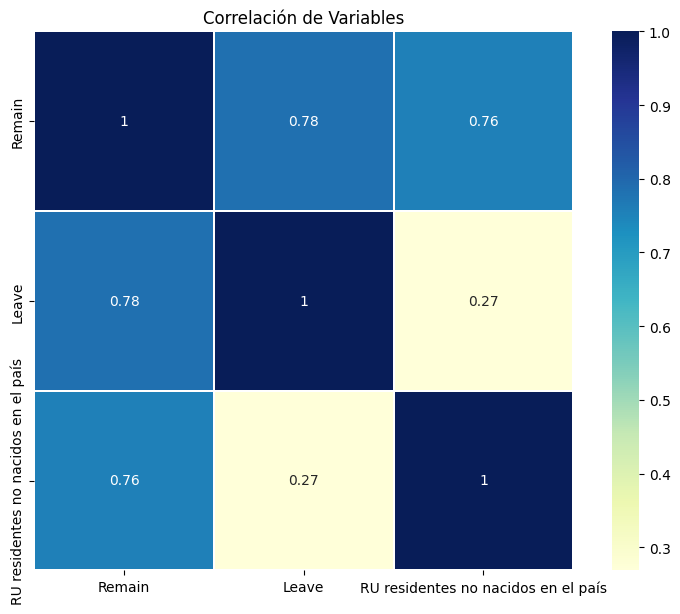

In [353]:
corr_no_nacido_RU=dt_place_graph_temporal[["Remain","Leave","RU residentes no nacidos en el país"]].corr()
figure(figsize=(10,7))
heatmap(corr_no_nacido_RU,vmax=1, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
title("Correlación de Variables")
#La correlación con respecto a los no nacidos en RU, pero que son residentes de tal país y una favorabilidad positiva de los votantes es relativamente alta, mientrás que los que están en contra la correlación es baja.


Text(0.5, 0, 'RU residentes no nacidos en el país')

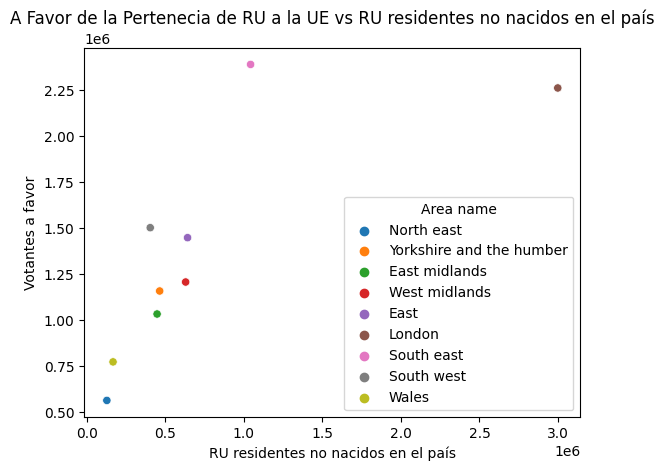

In [354]:
scatterplot(data=dt_place_graph_temporal,x="RU residentes no nacidos en el país",y='Remain',hue="Area name")
title("A Favor de la Pertenecia de RU a la UE vs RU residentes no nacidos en el país")
ylabel("Votantes a favor")
xlabel("RU residentes no nacidos en el país")

<ipython-input-355-1fff1d650251>:2: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  scatterplot(data=dt_place_graph_temporal,x="RU residentes no nacidos en el país",y='Leave',hue="Area name", palette=colors)


Text(0.5, 0, 'RU residentes no nacidos en el país')

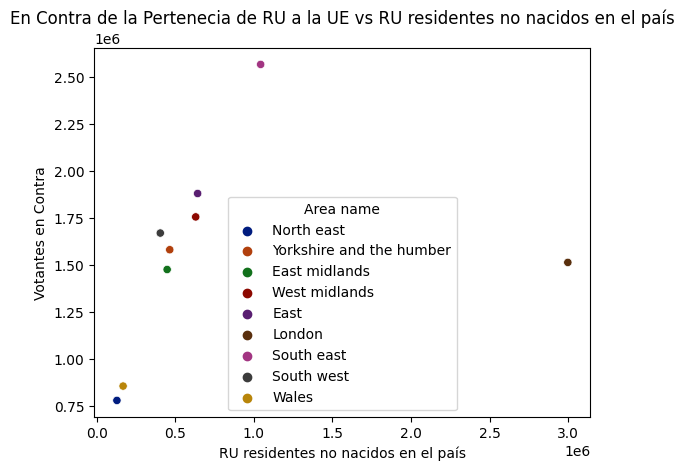

In [355]:
colors=color_palette("dark",12)
scatterplot(data=dt_place_graph_temporal,x="RU residentes no nacidos en el país",y='Leave',hue="Area name", palette=colors)
title("En Contra de la Pertenecia de RU a la UE vs RU residentes no nacidos en el país")
ylabel("Votantes en Contra")
xlabel("RU residentes no nacidos en el país")